# Precipitation in London

## Author: Mathew Thomas

## Introduction

Weather data encompasses a vast array of information therefore analyzing it, is crucial for various industries & fields. This includes meteorology, climate science, agriculture, energy, transportation, and disaster preparedness. Exploratory Data Analysis (EDA) plays a key role in understanding and interpreting this complex and dynamic dataset.

Using the concatenated dataset we created in the "Reworked datasets" notebook, we will explore the various weather attributes and determine using ML models how best to predict precipitation in London.

## Table of Contents

[1. EDA](#1.-EDA) <br>
- [Data Dictionary](#Data-Dictionary)
- [Exploring the dataset](#Exploring-the-dataset) 

[2. Model Approach 1](#2.-Model-Approach-1) <br>

[3. Model Approach 2](#3.-Model-Approach-2) <br>

[4. Model Approach 3](#4.-Model-Approach-3) <br>
    
[5. Conclusion](#5.-Conclusion) <br>

### Loading various libraries & dataset

In [2]:
# Import standard data science & visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
lw_df = pd.read_csv("C:\\Users\\mitth\\Documents\\Brainstation\\Final_Project\\London_Weather_EDA\\lw_df.csv")

## 1. EDA

### Data dictionary:
- `DATE`: recorded date of measurement
- `CC`: Cloud Cover, measurement in oktas 
- `HU`: Humidity, measurement in %
- `QQ`: Global Radiation, irradiance measurement in Watt per square meter (W/m2)
- `TX`: Temperature Maximum, maximum temperature recorded in degrees Celsius (°C)
- `TG`: Temperature Mean, mean temperature in degrees Celsius (°C)
- `TN`: Temperature Minimum, minimum temperature recorded in degrees Celsius (°C)
- `RR`: Precipitation, precipitation measurement in millimeters (mm)
- `PP`: Pressure, pressure measurement in Pascals (hPa)
- `SD`: Snow Depth, depth measurement in centimeters (cm)
- `SS`: Sunshine, measurement in hours (hrs)

### Exploring the dataset

In [4]:
lw_df.head()

,DATE,CC,HU,QQ,TX,TN,TG,RR,PP,SD,SS
0,1979-01-01,2.0,83.0,52.0,2.3,-7.5,-4.1,0.4,1019.0,9.0,7.0
1,1979-01-02,6.0,76.0,27.0,1.6,-7.5,-2.6,0.0,1025.3,8.0,1.7
2,1979-01-03,5.0,86.0,13.0,1.3,-7.2,-2.8,0.0,1020.5,4.0,0.0
3,1979-01-04,8.0,68.0,13.0,-0.3,-6.5,-2.6,0.0,1008.4,2.0,0.0
4,1979-01-05,6.0,73.0,29.0,5.6,-1.4,-0.8,0.0,1022.5,1.0,2.0


In [5]:
lw_df.shape

(16071, 11)

In [6]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16071 non-null  object 
 1   CC      16053 non-null  float64
 2   HU      16014 non-null  float64
 3   QQ      16046 non-null  float64
 4   TX      16071 non-null  float64
 5   TN      16071 non-null  float64
 6   TG      16071 non-null  float64
 7   RR      16071 non-null  float64
 8   PP      16071 non-null  float64
 9   SD      14996 non-null  float64
 10  SS      16071 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.3+ MB


In [7]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC        18
HU        57
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

#### Convert datatype for `DATE`

In [8]:
lw_df['DATE'] = pd.to_datetime(lw_df['DATE'], format='%Y-%m-%d', errors='coerce')

In [9]:
lw_df.head()

,DATE,CC,HU,QQ,TX,TN,TG,RR,PP,SD,SS
0,1979-01-01,2.0,83.0,52.0,2.3,-7.5,-4.1,0.4,1019.0,9.0,7.0
1,1979-01-02,6.0,76.0,27.0,1.6,-7.5,-2.6,0.0,1025.3,8.0,1.7
2,1979-01-03,5.0,86.0,13.0,1.3,-7.2,-2.8,0.0,1020.5,4.0,0.0
3,1979-01-04,8.0,68.0,13.0,-0.3,-6.5,-2.6,0.0,1008.4,2.0,0.0
4,1979-01-05,6.0,73.0,29.0,5.6,-1.4,-0.8,0.0,1022.5,1.0,2.0


In [10]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16071 non-null  datetime64[ns]
 1   CC      16053 non-null  float64       
 2   HU      16014 non-null  float64       
 3   QQ      16046 non-null  float64       
 4   TX      16071 non-null  float64       
 5   TN      16071 non-null  float64       
 6   TG      16071 non-null  float64       
 7   RR      16071 non-null  float64       
 8   PP      16071 non-null  float64       
 9   SD      14996 non-null  float64       
 10  SS      16071 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.3 MB


#### Cloud Cover null values

In [11]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC        18
HU        57
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

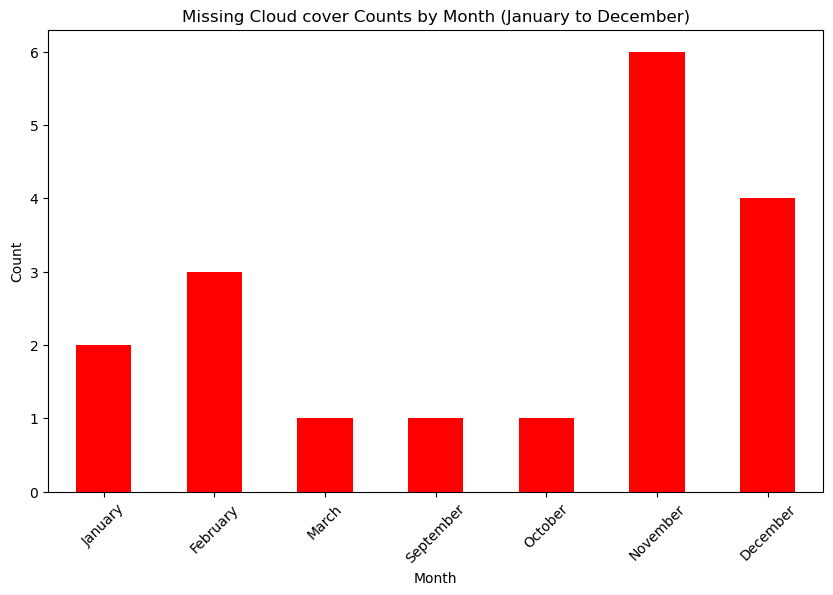

In [12]:
# Let's graph out the missing cloudcover values and group them by month
missing_dates = lw_df[lw_df['CC'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing cloudcover per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing cloud cover counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing Cloud cover Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

In looking at where these null values lie, we don't see any distinguishable patterns. 

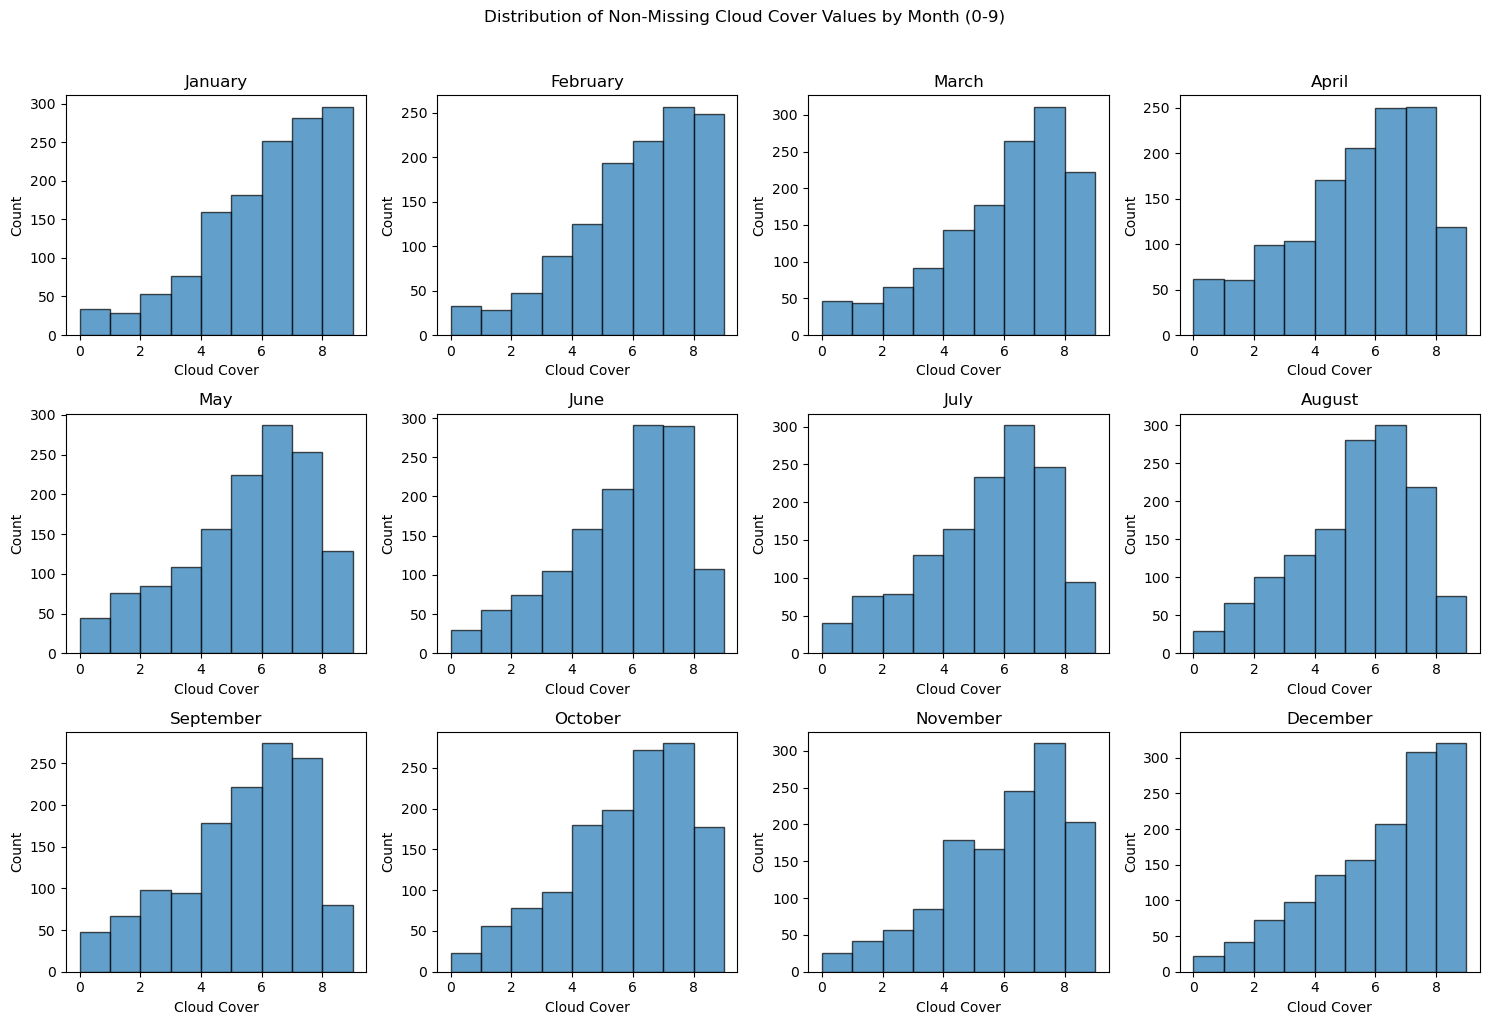

In [13]:
# Filter rows where 'CC' (cloud cover) is not missing
non_missing_data = lw_df[lw_df['CC'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Cloud Cover Values by Month (0-9)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['CC']
    ax.hist(data_for_month, bins=range(10), alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Cloud Cover')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Here we have plotted the spread of `CC` as seen per month. Since it shows a general skew for each month, we can try to replace the missing values with corresponding median of each month. 

In [14]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate median values for each month
monthly_medians = lw_df.groupby(['Month', 'Year'])['CC'].median().reset_index()

# Define a function to fill missing values with the monthly median
def fill_missing_cc(row):
    mask = (monthly_medians['Month'] == row['Month']) & (monthly_medians['Year'] == row['Year'])
    median_value = monthly_medians.loc[mask, 'CC'].values
    return median_value[0] if len(median_value) > 0 else row['CC']

# Apply the fill_missing_cc function to fill missing values
lw_df['CC'] = lw_df.apply(lambda row: fill_missing_cc(row) if pd.isnull(row['CC']) else row['CC'], axis=1)

# Drop temporary 'Month' and 'Year' columns 
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


#### Humidity Null Values

In [15]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC         0
HU        57
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

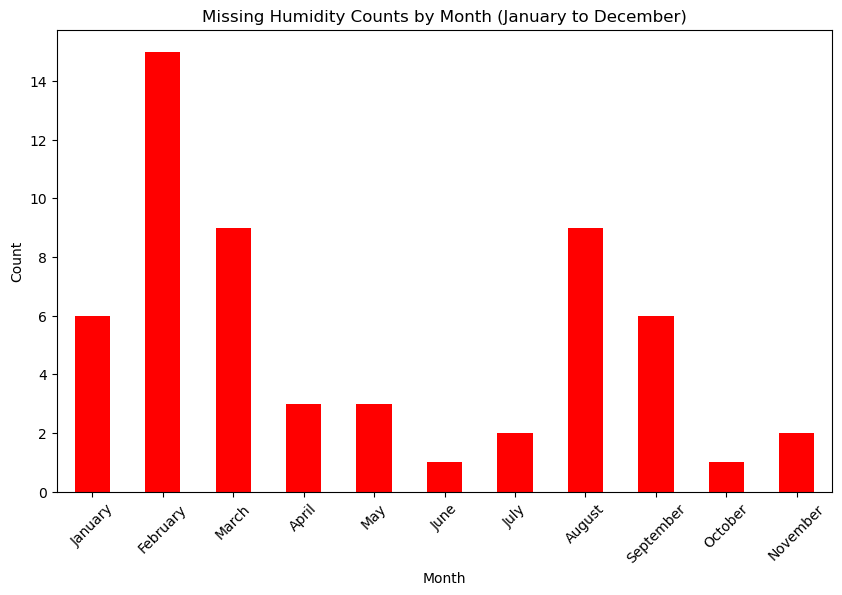

In [16]:
# Let's graph out the missing humidity values and group them by month
missing_dates = lw_df[lw_df['HU'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing humidity per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing humidity counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing Humidity Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

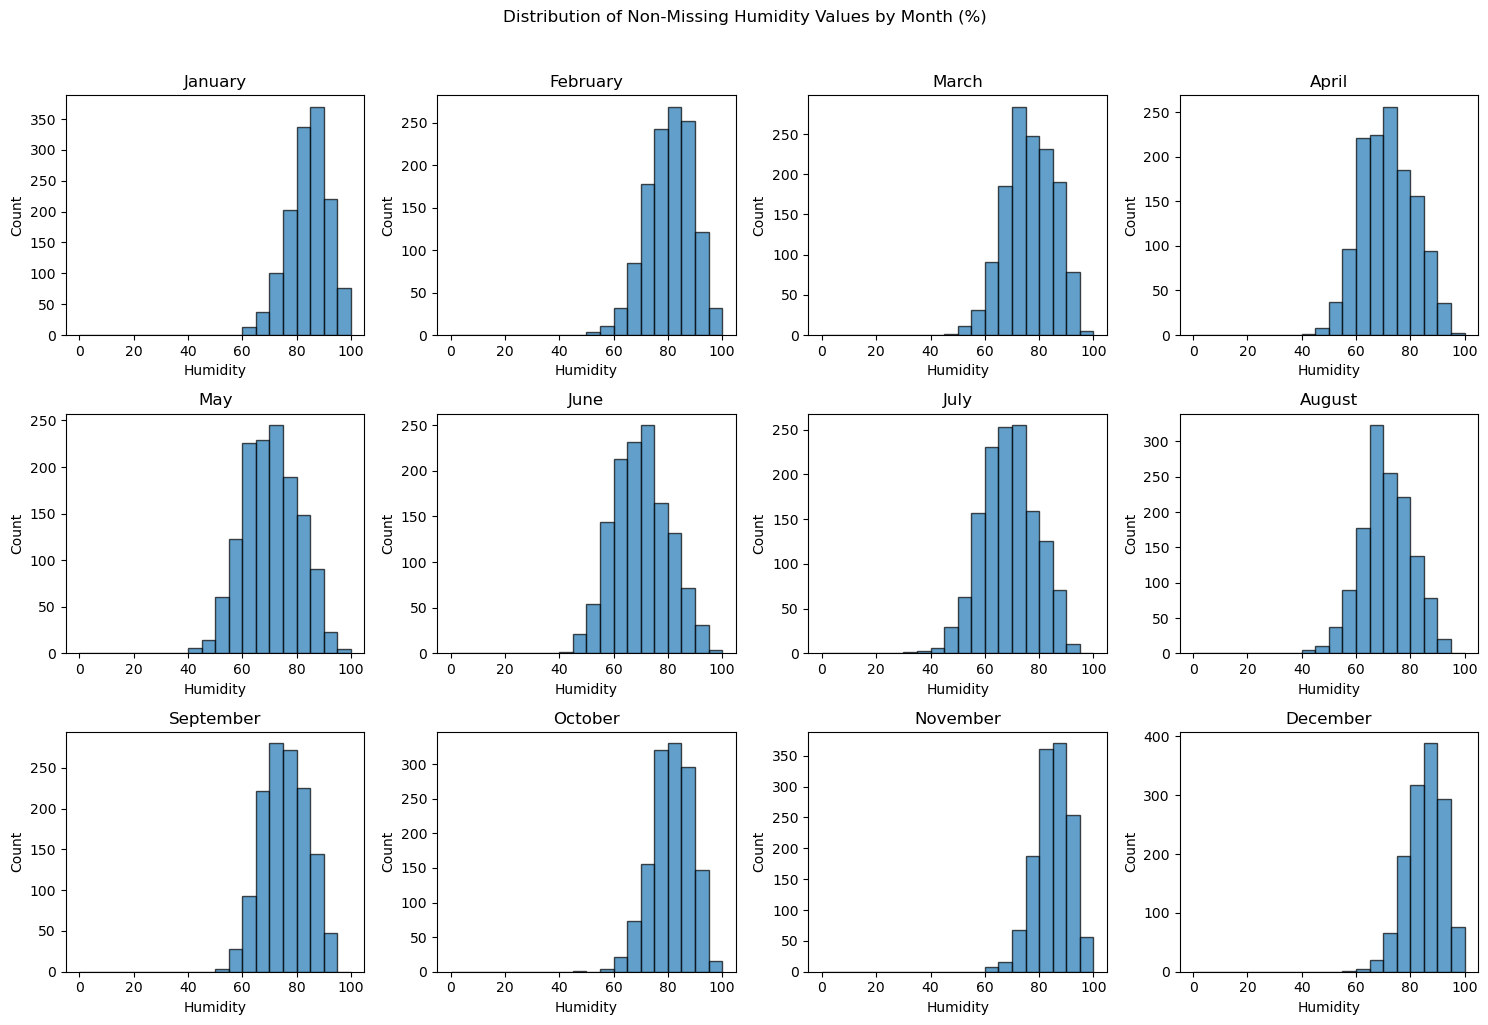

In [17]:
# Filter rows where 'HU' (humidity) is not missing
non_missing_data = lw_df[lw_df['HU'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Humidity Values by Month (%)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['HU']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black', range=(0, 100))  
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Humidity')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

As each month generally shows a normal distribution, we can try to replace the null values with the corresponding monthly mean.

In [18]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate mean values for each month and broadcast back to the original DataFrame
lw_df['HU'] = lw_df['HU'].fillna(lw_df.groupby(['Month', 'Year'])['HU'].transform('mean'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


#### Global Radiation Null Values

In [19]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC         0
HU         0
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

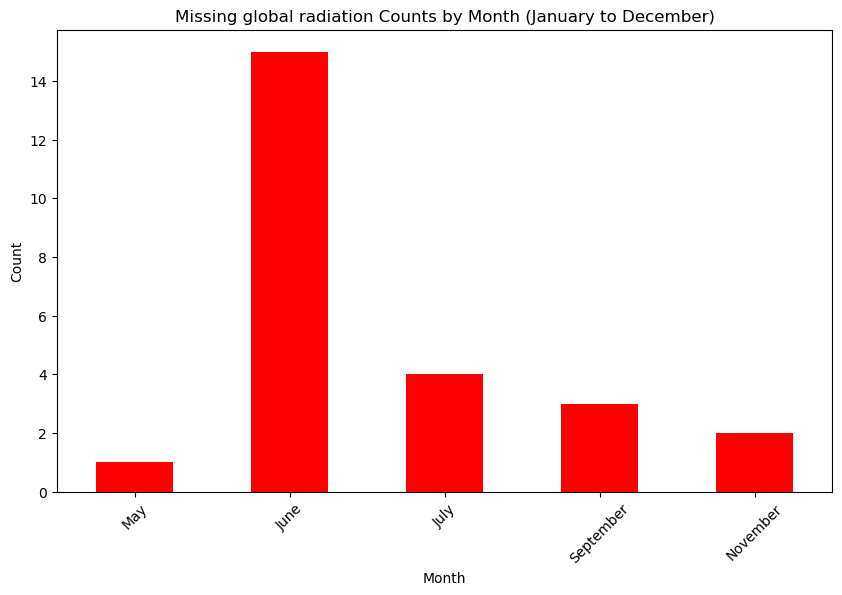

In [20]:
# Let's graph out the missing global radiation values and group them by month
missing_dates = lw_df[lw_df['QQ'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing global radiation per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing global radiation counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing global radiation Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

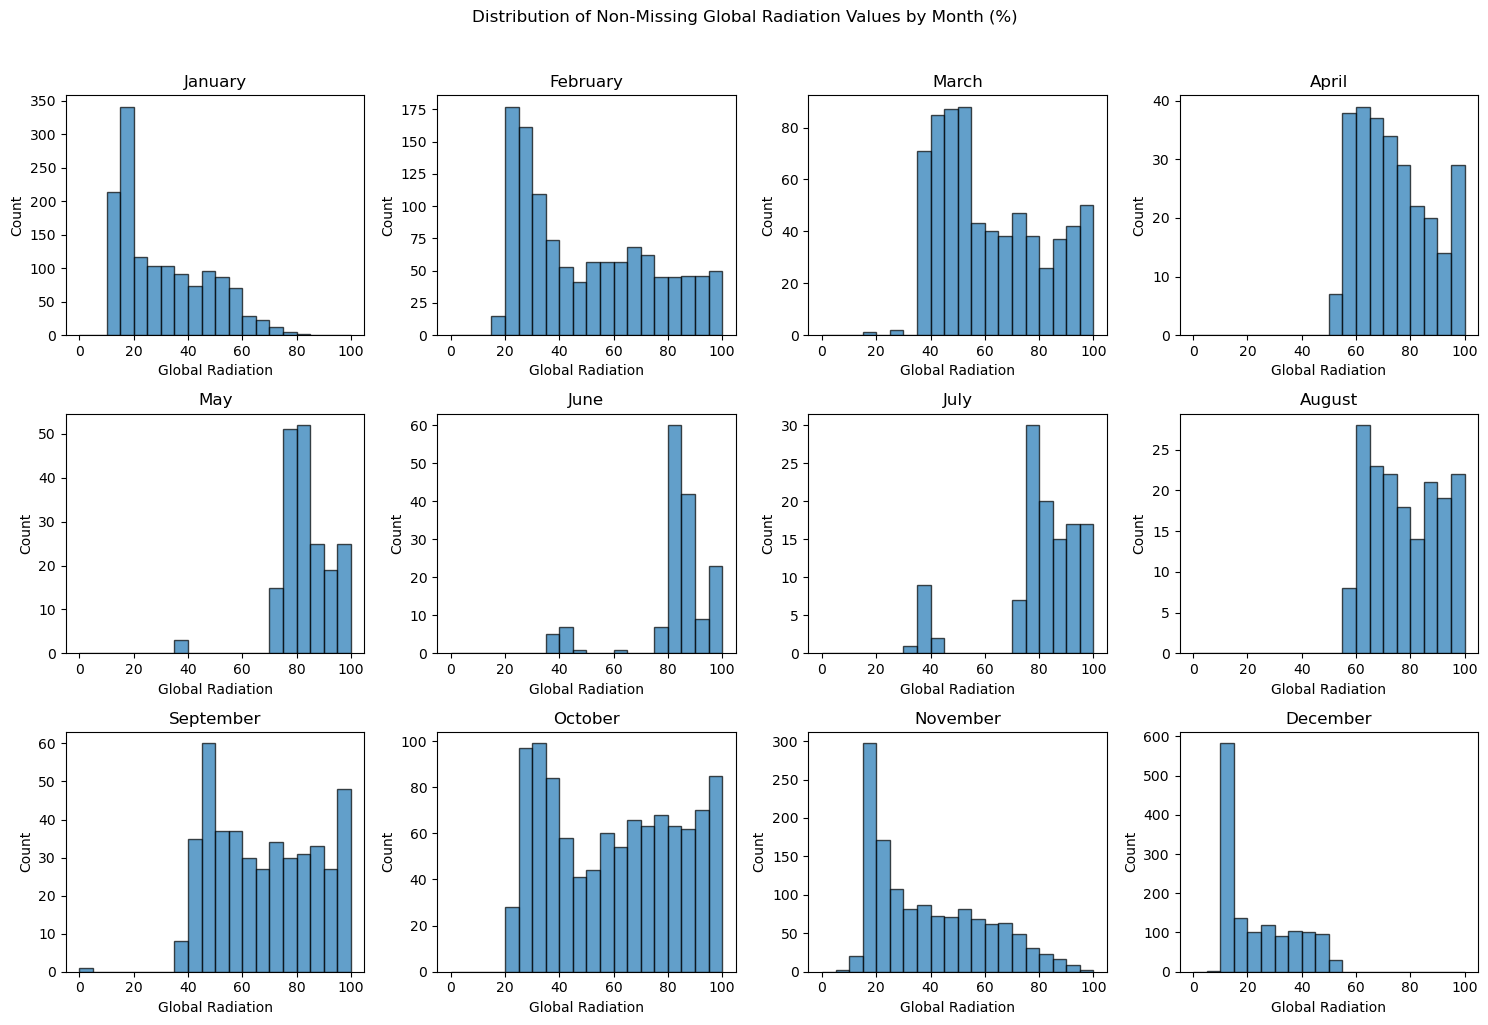

In [21]:
# Filter rows where 'QQ' (global radiation) is not missing
non_missing_data = lw_df[lw_df['QQ'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Global Radiation Values by Month (%)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['QQ']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black', range=(0, 100))  # Adjust the number of bins and range
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Global Radiation')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Since we can't find any distinguishable patters, we can opt in replacing every null value with their corresponding monthly median value. 

In [22]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate median values for each month and broadcast back to the original DataFrame
lw_df['QQ'] = lw_df['QQ'].fillna(lw_df.groupby(['Month', 'Year'])['QQ'].transform('median'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [23]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC         0
HU         0
QQ         0
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

#### Finally Snow Depth Null Values

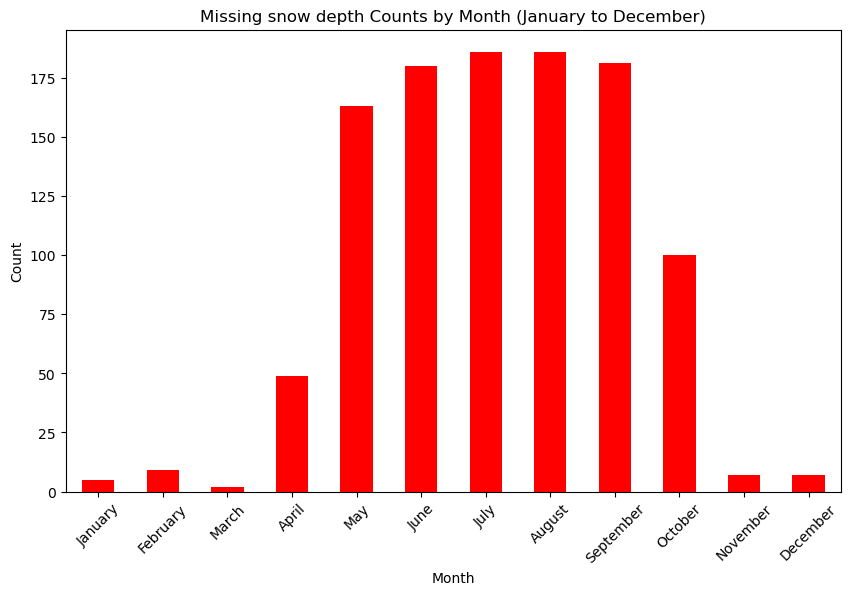

In [24]:
# Let's graph out the missing snow depth values and group them by month
missing_dates = lw_df[lw_df['SD'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing snow depth per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing snow depth counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing snow depth Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

It likely could be there was no snow to measure from observing the above pattern. We can use a statistical measure (mean) to replace the null values. 

In [25]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate mean values for each month and broadcast back to the original DataFrame
lw_df['SD'] = lw_df['SD'].fillna(lw_df.groupby(['Month', 'Year'])['SD'].transform('mean'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [26]:
# Check for missing values
lw_df.isnull().sum()

DATE      0
CC        0
HU        0
QQ        0
TX        0
TN        0
TG        0
RR        0
PP        0
SD      856
SS        0
dtype: int64

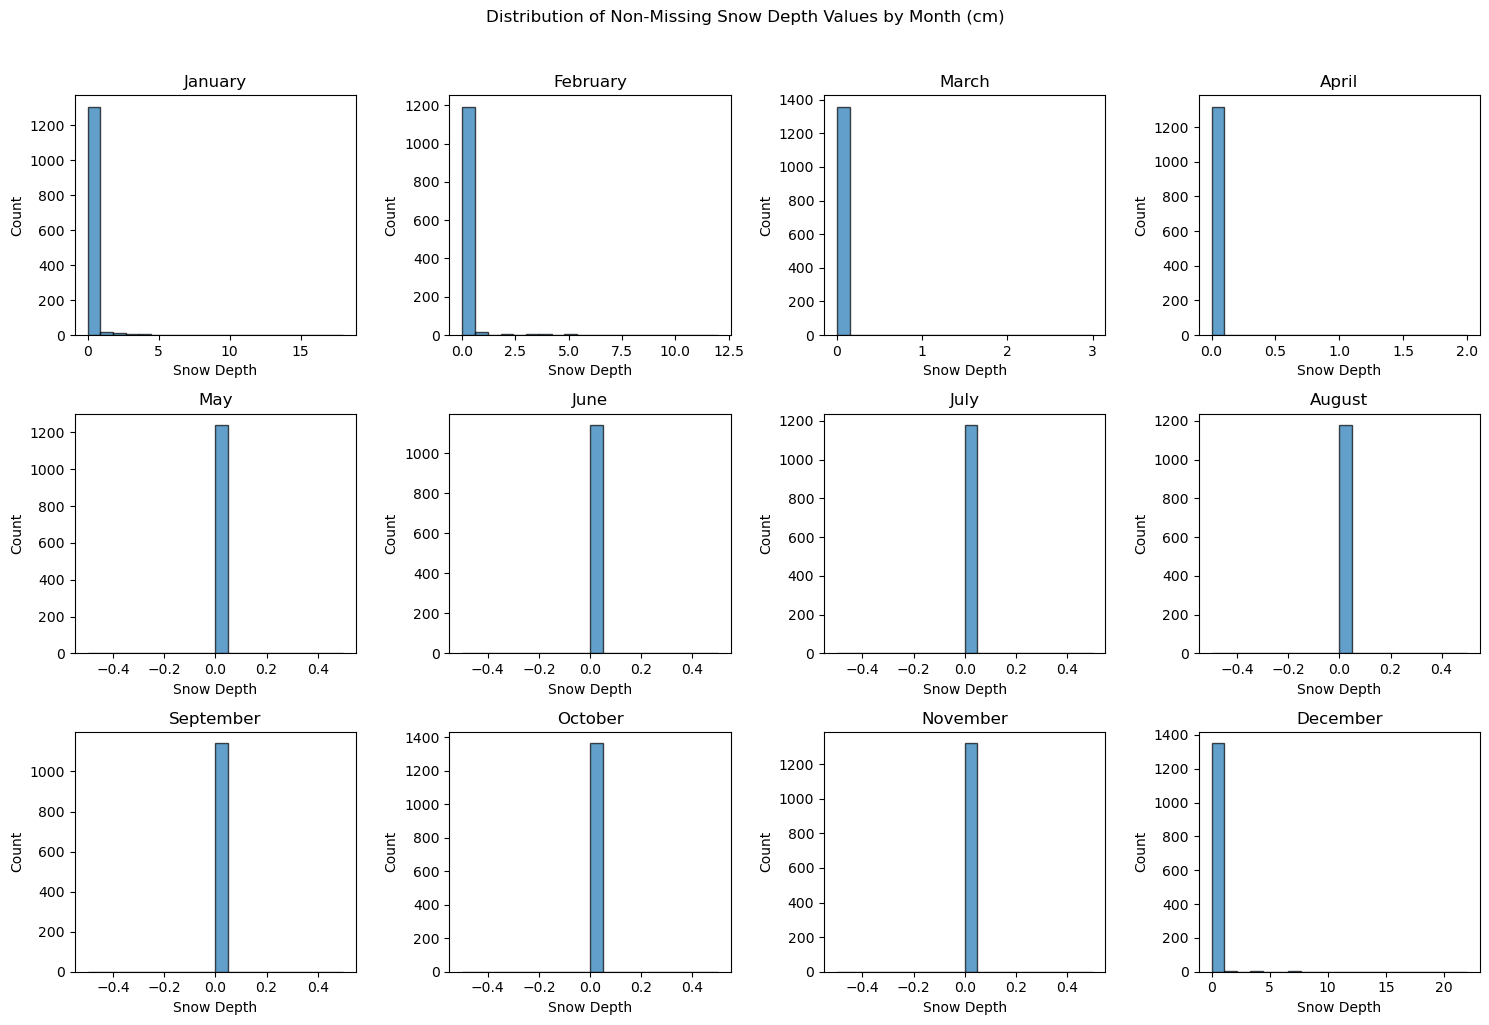

In [27]:
# Filter rows where 'SD' (snow depth) is not missing
non_missing_data = lw_df[lw_df['SD'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Snow Depth Values by Month (cm)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['SD']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Snow Depth')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [28]:
non_missing_data = lw_df[lw_df['SD'].isna()]
non_missing_data['SD'].fillna(-1, inplace=True)

C:\Users\mitth\AppData\Local\Temp\ipykernel_38280\1604471252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_missing_data['SD'].fillna(-1, inplace=True)


In [29]:
non_missing_data

,DATE,CC,HU,QQ,TX,TN,TG,RR,PP,SD,SS
10013,2006-06-01,6.0,73.0,97.0,16.2,5.3,10.8,0.0,1028.1,-1.0,0.3
10014,2006-06-02,3.0,72.0,244.0,20.6,10.0,15.3,0.0,1030.3,-1.0,7.7
10015,2006-06-03,0.0,56.0,333.0,24.2,9.9,17.0,0.0,1029.5,-1.0,14.4
10016,2006-06-04,4.0,60.0,255.0,23.6,11.5,17.6,0.4,1026.5,-1.0,8.4
10017,2006-06-05,4.0,67.0,284.0,20.1,12.9,16.5,0.0,1025.6,-1.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...
11956,2011-09-26,6.0,81.0,76.0,21.8,16.1,19.4,4.2,1020.5,-1.0,1.6
11957,2011-09-27,3.0,85.0,111.0,25.9,11.8,16.8,0.2,1028.4,-1.0,4.5
11958,2011-09-28,0.0,76.0,168.0,28.1,12.3,19.1,0.0,1026.3,-1.0,10.9
11959,2011-09-29,0.0,71.0,166.0,28.5,12.7,20.4,0.0,1023.4,-1.0,10.8


C:\Users\mitth\AppData\Local\Temp\ipykernel_38280\3116736831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_missing_data['SD'].fillna(-10, inplace=True)


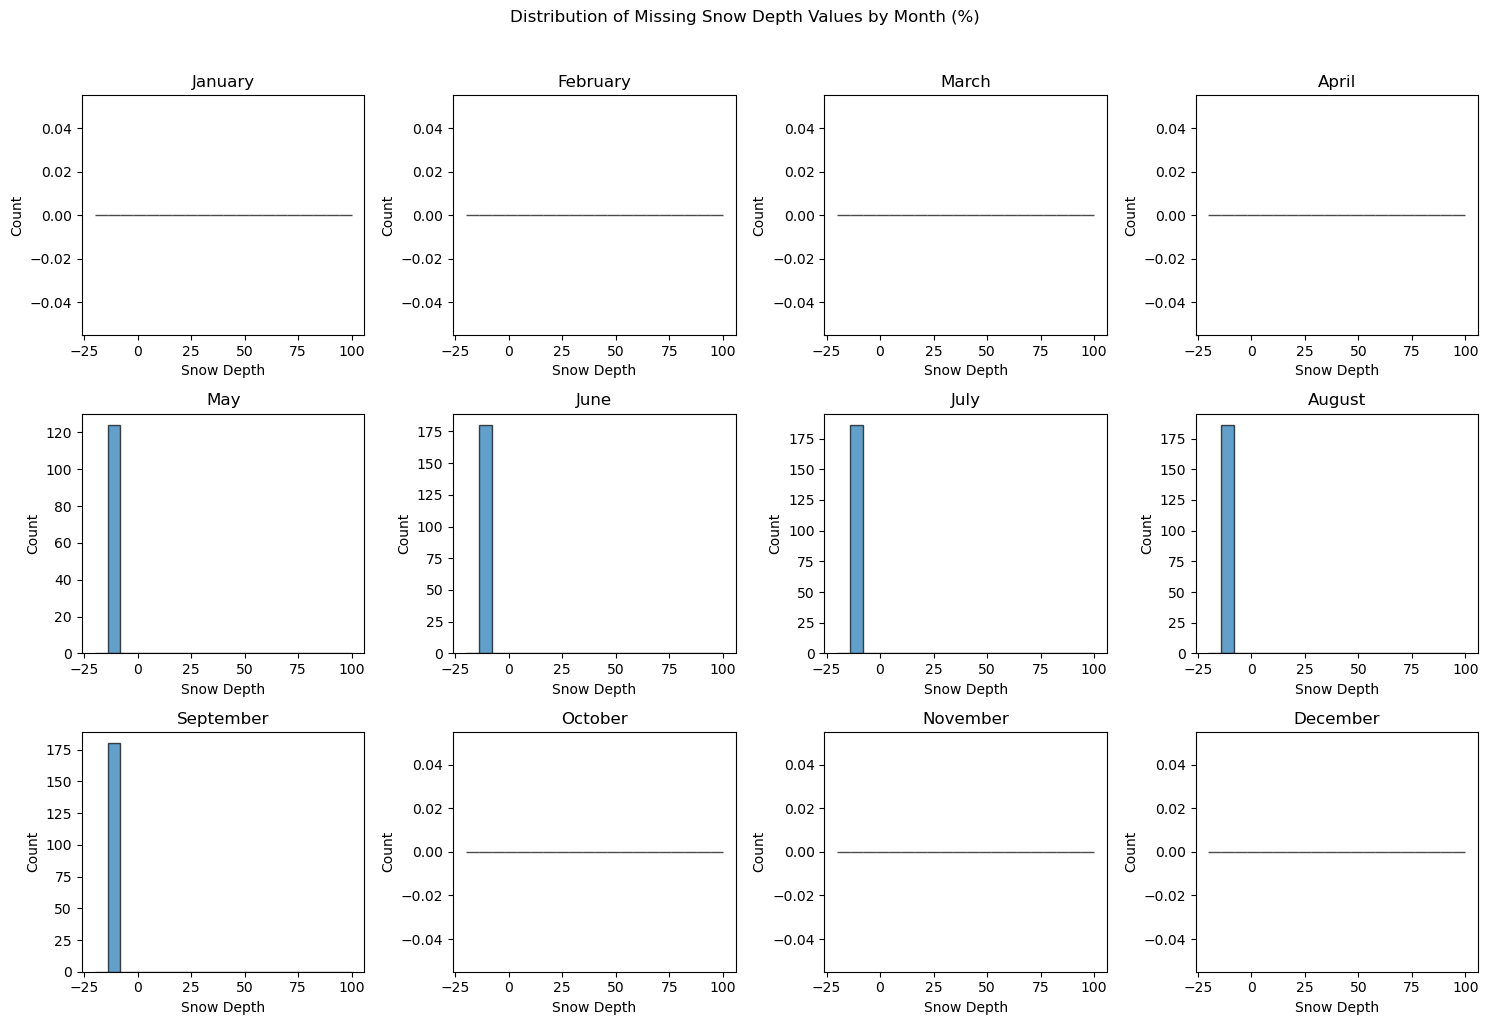

In [30]:
# Filter rows where 'SD' (snow depth) is missing
non_missing_data = lw_df[lw_df['SD'].isna()]
non_missing_data['SD'].fillna(-10, inplace=True)

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Missing Snow Depth Values by Month (%)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['SD']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black', range=(-20, 100))  # Adjust the number of bins and range
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Snow Depth')
    ax.set_ylabel('Count')
#     ax.set_xscale('log')

plt.tight_layout()
plt.show()

In [31]:
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

lw_df.loc[lw_df.groupby(['Year', 'Month'])['SD'].transform('mean').isnull()].groupby(['Month','Year'])['SD'].unique()

Month  Year
5      2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
6      2006    [nan]
       2007    [nan]
       2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
7      2006    [nan]
       2007    [nan]
       2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
8      2006    [nan]
       2007    [nan]
       2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
9      2006    [nan]
       2007    [nan]
       2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
Name: SD, dtype: object

In [32]:
lw_df.loc[np.where(lw_df["Month"].isin(lw_df.loc[lw_df.groupby(['Month', 'Year'])['SD'].transform('mean').isnull()]['Month'].unique()))]

,DATE,CC,HU,QQ,TX,TN,TG,RR,PP,SD,SS,Month,Year
120,1979-05-01,8.0,86.0,86.0,8.0,3.8,5.6,14.2,1002.8,0.0,0.3,5,1979
121,1979-05-02,5.0,82.0,214.0,10.0,1.1,4.6,1.4,1004.8,0.0,7.2,5,1979
122,1979-05-03,3.0,80.0,245.0,9.1,-0.9,4.6,0.0,1009.3,0.0,9.4,5,1979
123,1979-05-04,3.0,76.0,252.0,11.1,-0.3,4.4,0.4,1015.9,0.0,9.9,5,1979
124,1979-05-05,4.0,80.0,243.0,12.4,1.7,6.4,0.0,1020.6,0.0,9.1,5,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,2022-09-26,8.0,72.0,105.0,15.0,11.1,13.4,0.0,1003.3,0.0,3.8,9,2022
15975,2022-09-27,6.0,77.0,85.0,15.6,8.6,11.8,1.6,1001.7,0.0,1.6,9,2022
15976,2022-09-28,4.0,73.0,104.0,16.9,5.2,10.4,0.0,1000.4,0.0,5.6,9,2022
15977,2022-09-29,5.0,73.0,126.0,16.7,5.9,11.4,0.0,1004.1,0.0,5.7,9,2022


The reason subbing the mean in for the null values doesn't work is likely because the average is NaN. Hence, we can approach the remaining null values as 0. We move with the assumption that there were no values as there was no snow depth to record.

In [33]:
lw_df['SD'].fillna(0, inplace=True)

In [34]:
lw_df.isnull().sum()

DATE     0
CC       0
HU       0
QQ       0
TX       0
TN       0
TG       0
RR       0
PP       0
SD       0
SS       0
Month    0
Year     0
dtype: int64

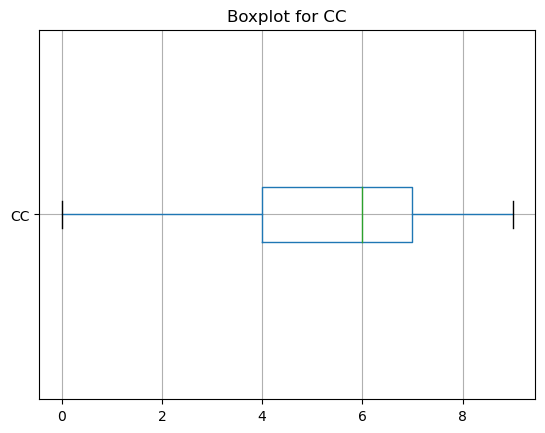

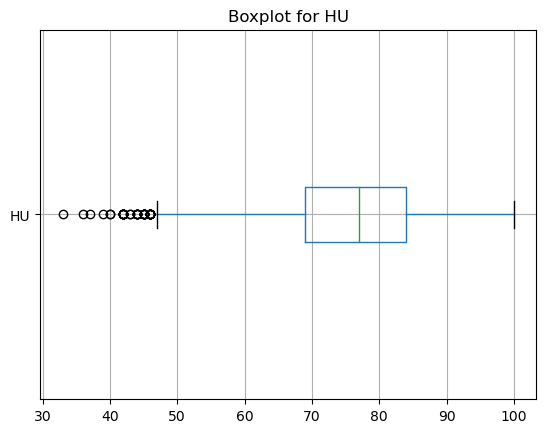

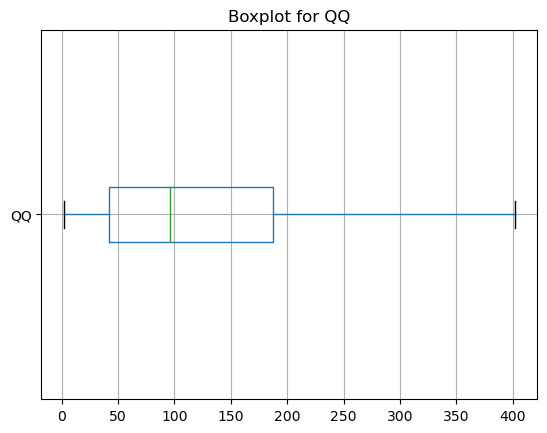

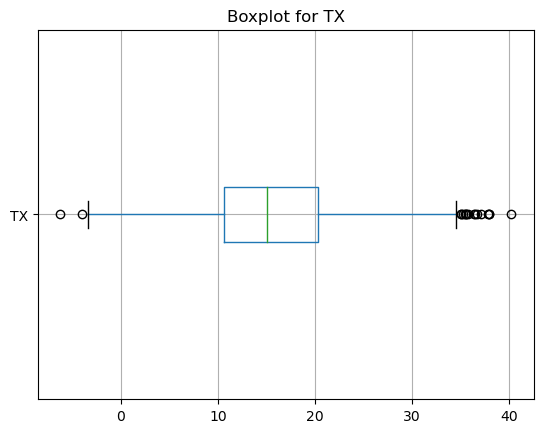

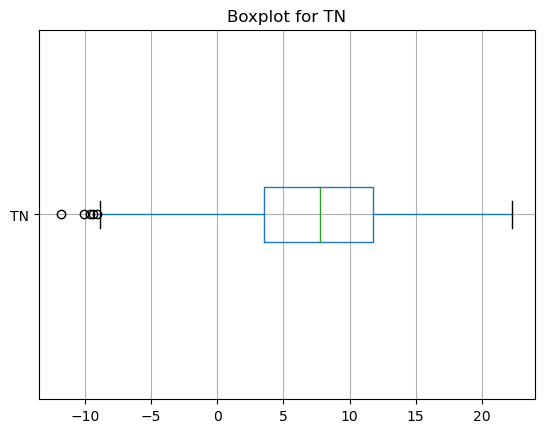

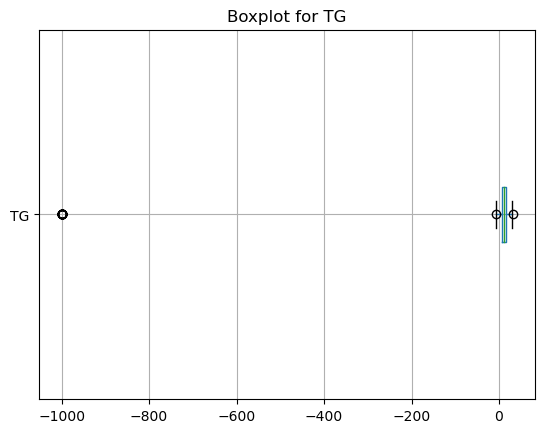

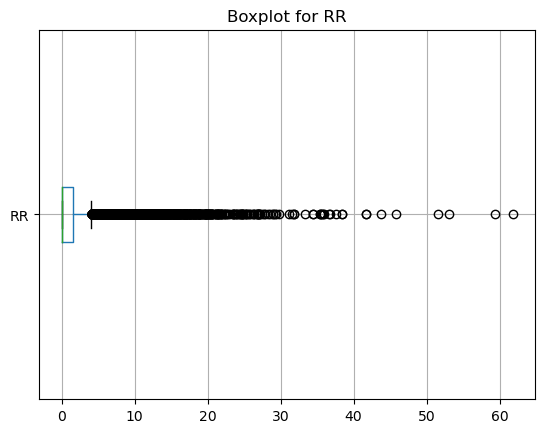

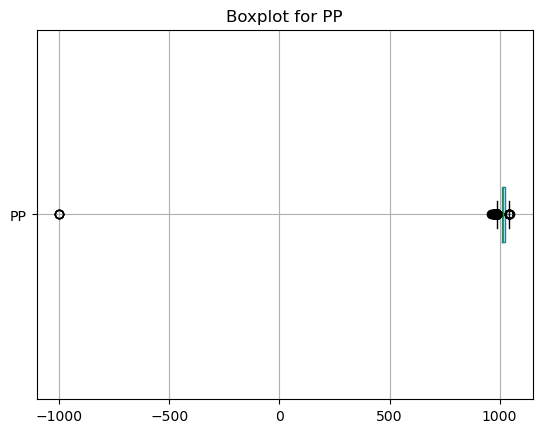

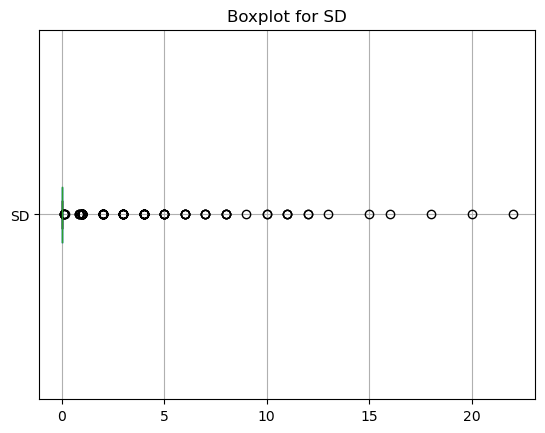

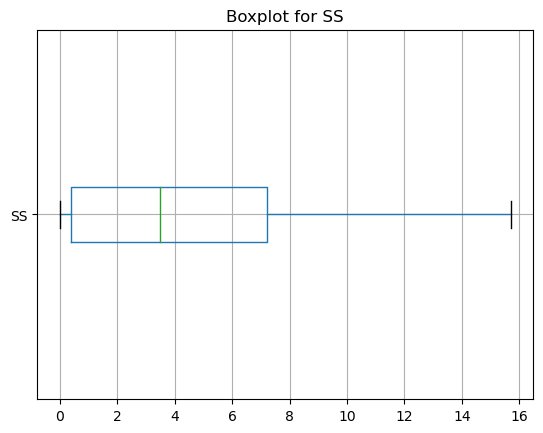

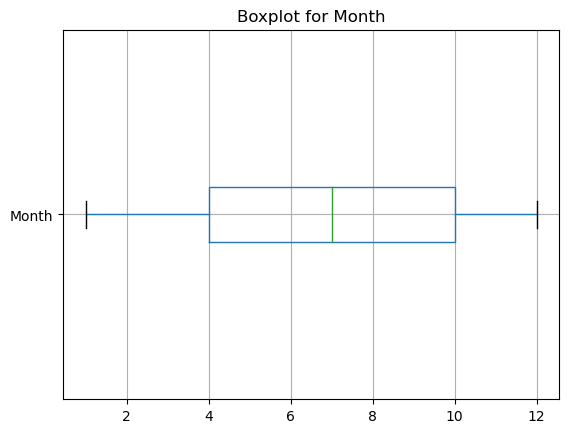

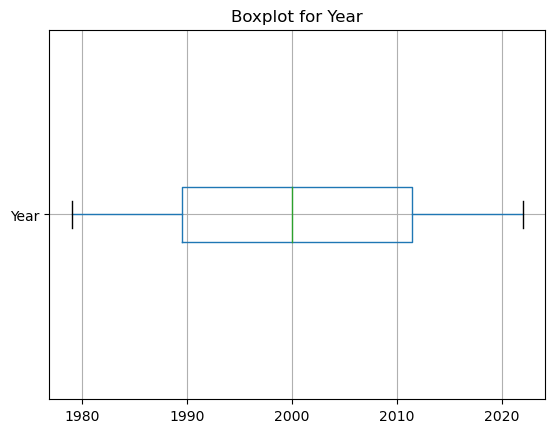

In [35]:
# Creating a boxplot to check for anomalies 
# Exclude 'DATE' column
columns_to_plot = [column for column in lw_df.columns if column != 'DATE']

for column in columns_to_plot:
    plt.figure()
    plt.title(f"Boxplot for {column}")
    lw_df.boxplot(column=column, vert=False)
    plt.show()

#### Need to look into following for outliers:
- TG mean temperature, close to -1000 values
- PP pressure, close to -1000 values

In [36]:
#Finding out how many values are below an extreme value
num_values_less_than_minus_200 = (lw_df['TG'] < -200).sum()

print(f"Number of values in 'TG' column less than -200: {num_values_less_than_minus_200}")

Number of values in 'TG' column less than -200: 29


In [37]:
#Finding out what the value is
values_less_than_minus_200 = lw_df.loc[lw_df['TG'] < -200, 'TG']

# Display the values
print("Values in 'TG' column less than -200:")
print(values_less_than_minus_200)

Values in 'TG' column less than -200:
9751    -999.9
9784    -999.9
9860    -999.9
9870    -999.9
9895    -999.9
9937    -999.9
9985    -999.9
10107   -999.9
10173   -999.9
10196   -999.9
10199   -999.9
10276   -999.9
10310   -999.9
10316   -999.9
10368   -999.9
10498   -999.9
10502   -999.9
10525   -999.9
10595   -999.9
10662   -999.9
10702   -999.9
10739   -999.9
10751   -999.9
10810   -999.9
10814   -999.9
10903   -999.9
11015   -999.9
11060   -999.9
11082   -999.9
Name: TG, dtype: float64


From our supplementary document, we know these represent null values. We should now convert them.

In [38]:
lw_df['TG'].replace(-999.9, pd.NA, inplace=True)

# Count the occurrences of pd.NA in the 'TG' column
missing_counts = lw_df['TG'].isna().sum()

# Print the counts
print(missing_counts)

29


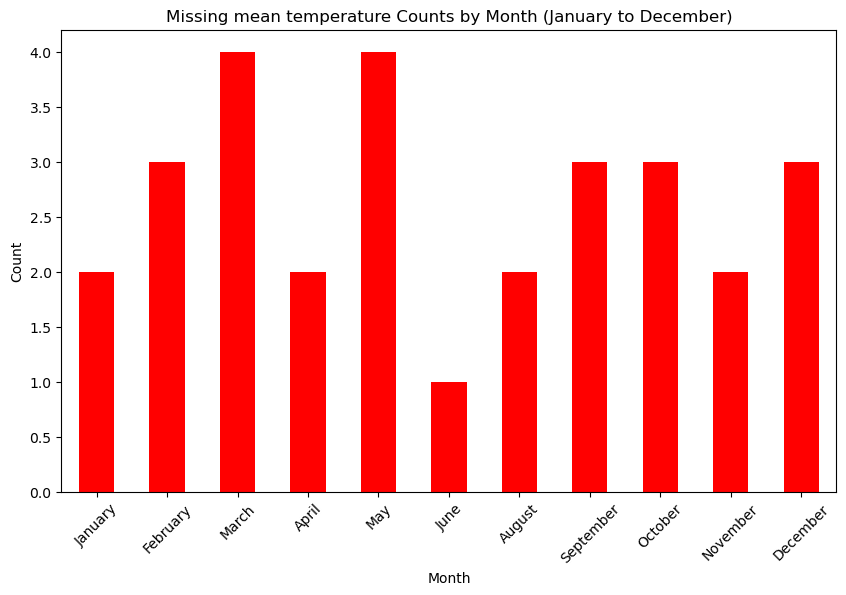

In [39]:
# Let's graph out the missing mean temperature values and group them by month
missing_dates = lw_df[lw_df['TG'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing mean temperature per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing mean temperature counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing mean temperature Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

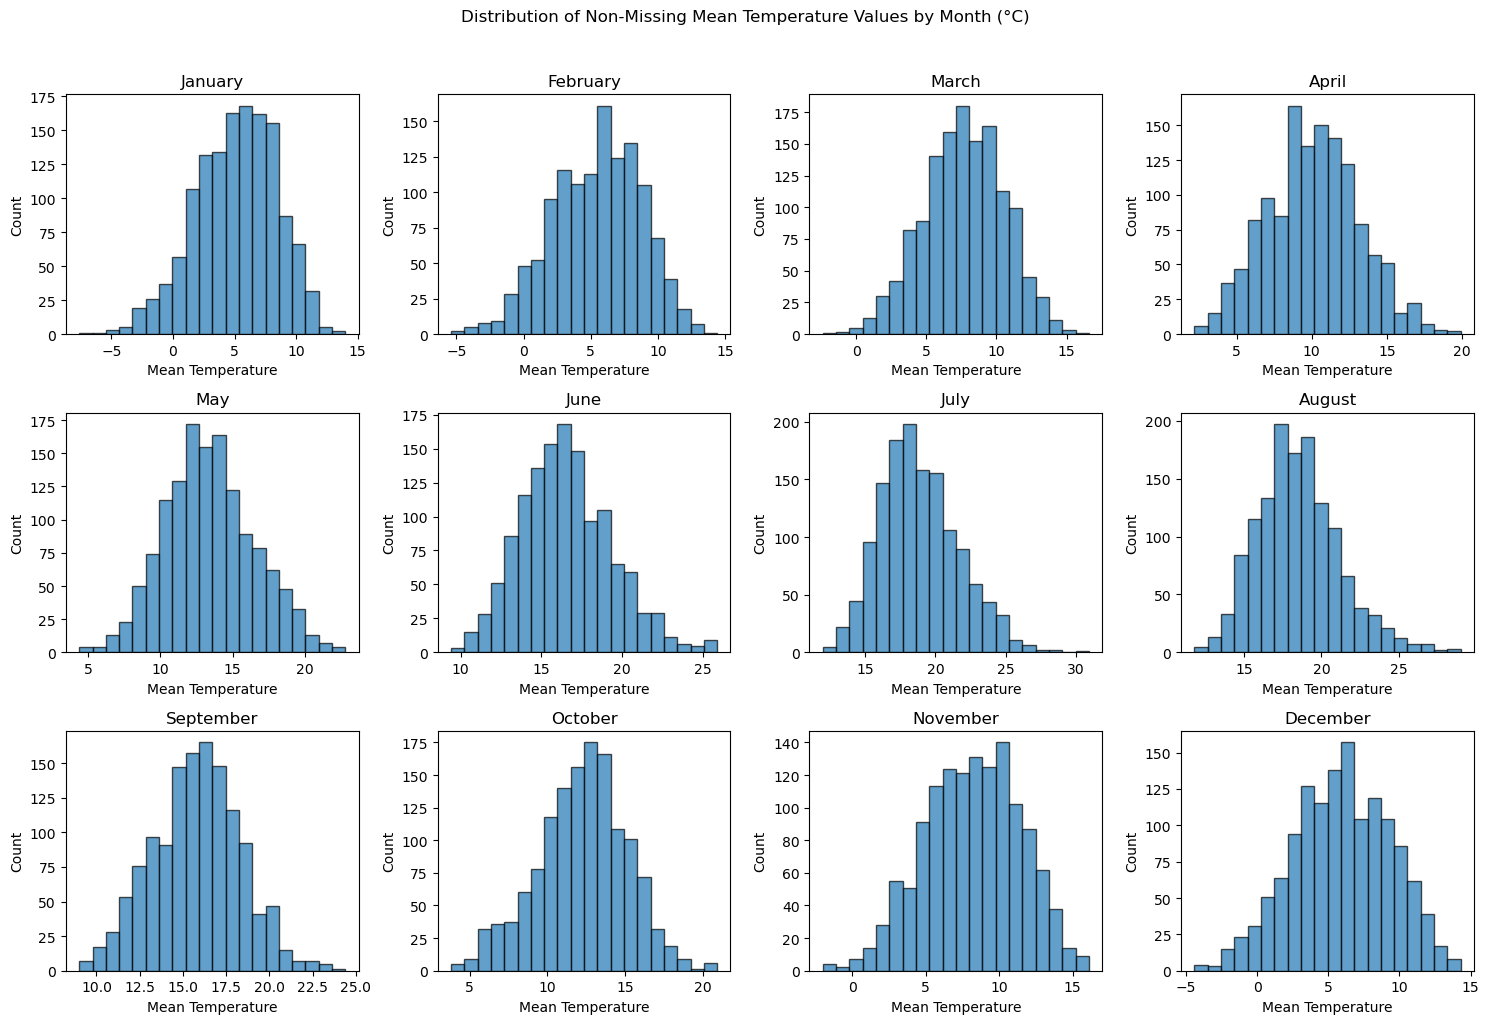

In [40]:
# Filter rows where 'TG' (mean temperature) is not missing
non_missing_data = lw_df[lw_df['TG'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Mean Temperature Values by Month (°C)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['TG']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Mean Temperature')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We'll use the mean of each month to fill in the null values

In [41]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate mean values for each month and broadcast back to the original DataFrame
lw_df['TG'] = lw_df['TG'].fillna(lw_df.groupby(['Month', 'Year'])['SD'].transform('mean'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [42]:
lw_df.isnull().sum()

DATE    0
CC      0
HU      0
QQ      0
TX      0
TN      0
TG      0
RR      0
PP      0
SD      0
SS      0
dtype: int64

#### Now Pressure

In [43]:
# Assuming lw_df is your DataFrame
num_values_less_than_minus_200 = (lw_df['PP'] < -100).sum()

print(f"Number of values in 'PP' column less than -100: {num_values_less_than_minus_200}")

Number of values in 'PP' column less than -100: 4


In [44]:
#Finding out what the value is
values_less_than_minus_200 = lw_df.loc[lw_df['PP'] < -100, 'PP']

# Display the values
print("Values in 'TG' column less than -100:")
print(values_less_than_minus_200)

Values in 'TG' column less than -100:
362     -999.9
10101   -999.9
11013   -999.9
11014   -999.9
Name: PP, dtype: float64


In [45]:
lw_df['PP'].replace(-999.9, pd.NA, inplace=True)

# Count the occurrences of pd.NA in the 'PP' column
missing_counts = lw_df['PP'].isna().sum()

# Print the counts
print(missing_counts)

4


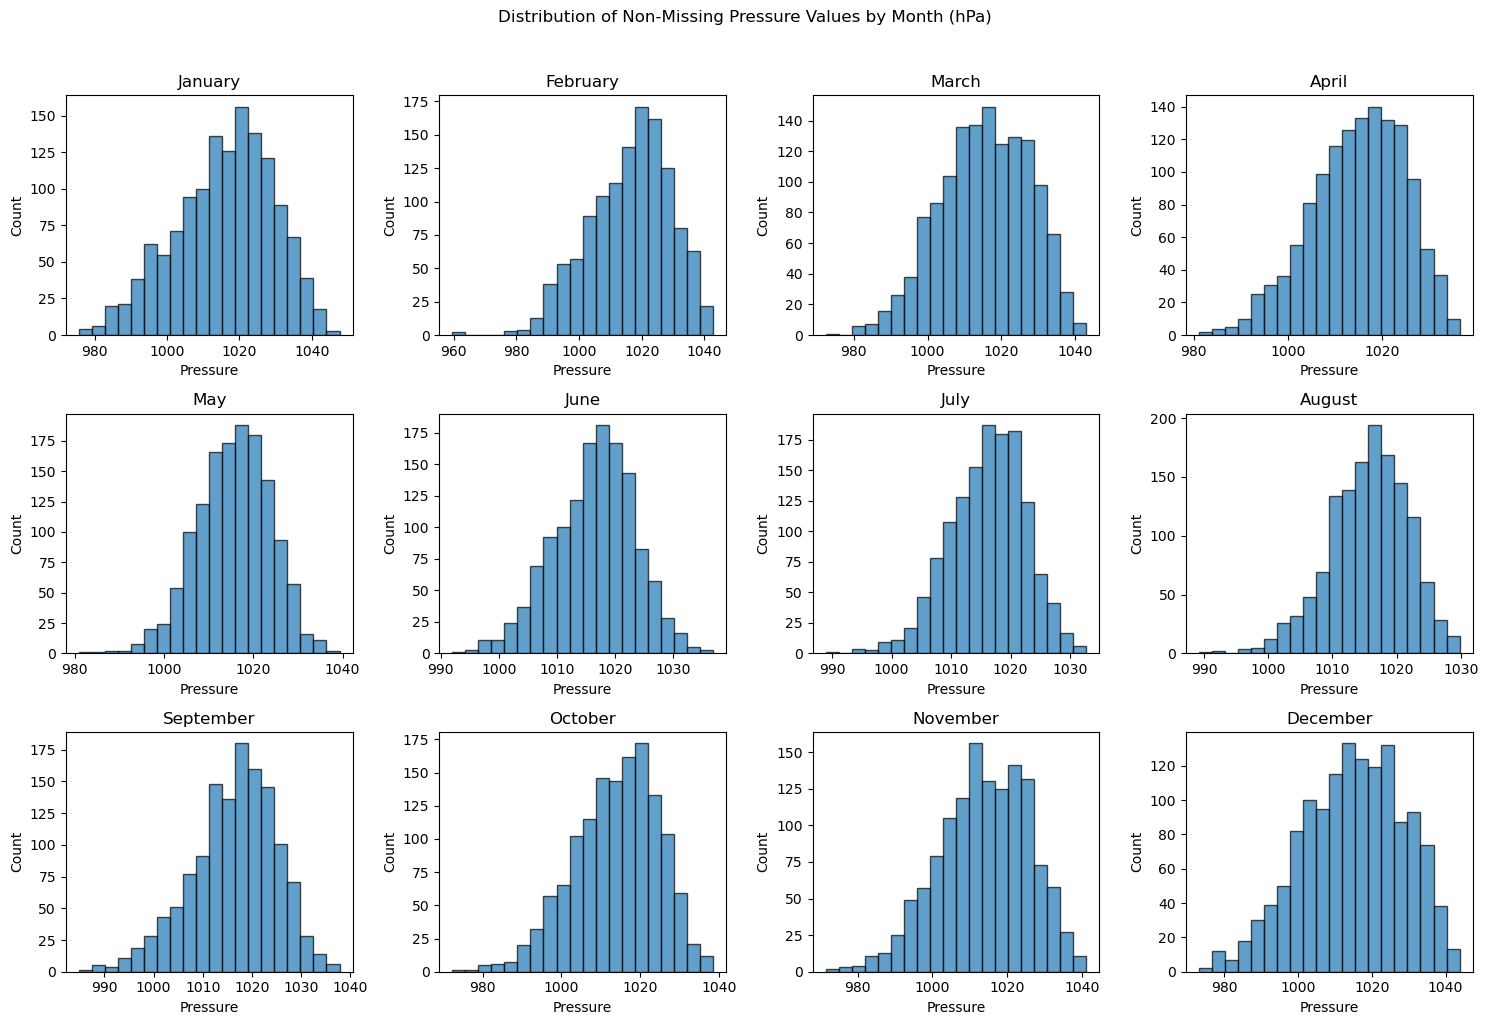

In [46]:
# Filter rows where 'PP' (pressure) is not missing
non_missing_data = lw_df[lw_df['PP'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Pressure Values by Month (hPa)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['PP']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Pressure')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We'll use the mean of each month to fill in the null values

In [47]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate pressure values for each month and broadcast back to the original DataFrame
lw_df['PP'] = lw_df['PP'].fillna(lw_df.groupby(['Month', 'Year'])['PP'].transform('mean'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [48]:
lw_df.isnull().sum()

DATE    0
CC      0
HU      0
QQ      0
TX      0
TN      0
TG      0
RR      0
PP      0
SD      0
SS      0
dtype: int64

### Visualising the features

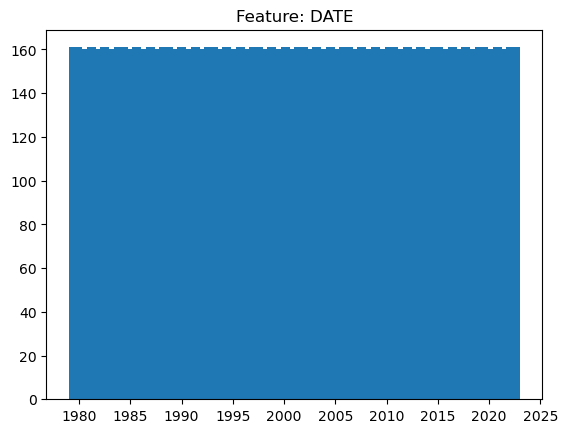

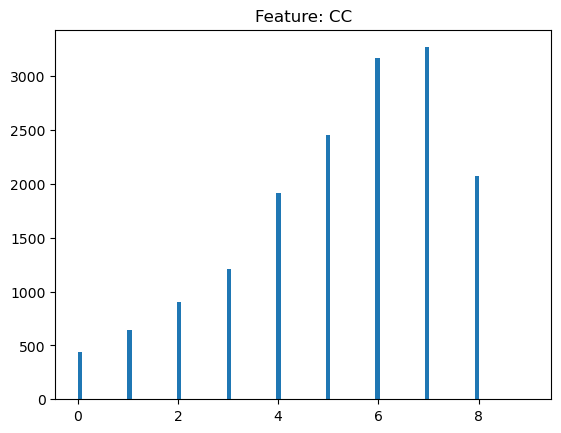

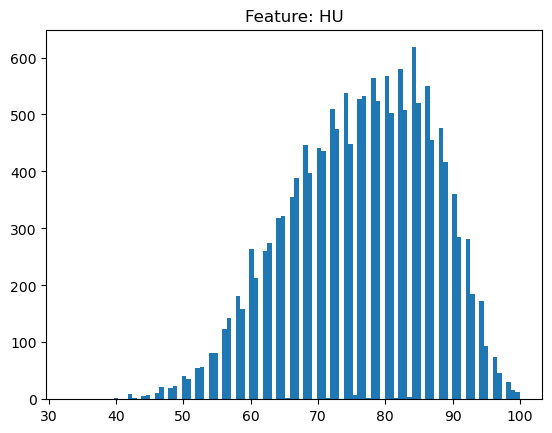

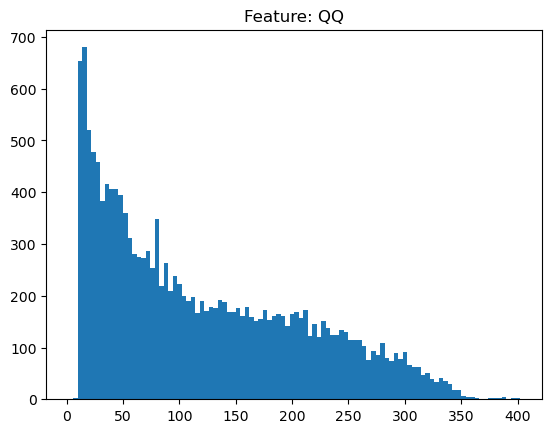

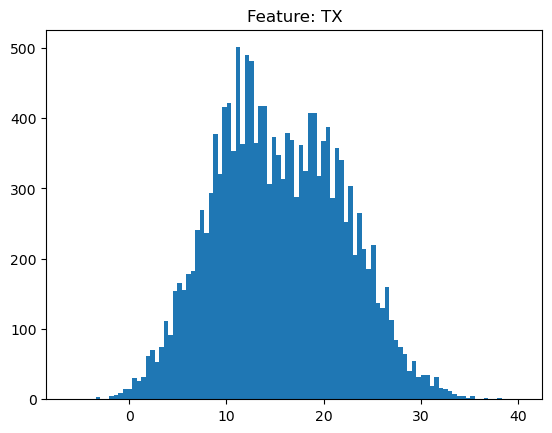

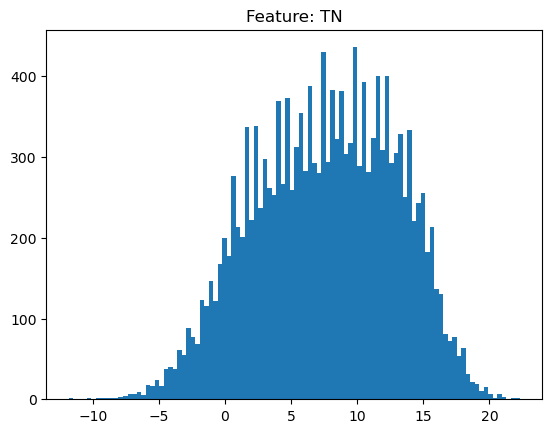

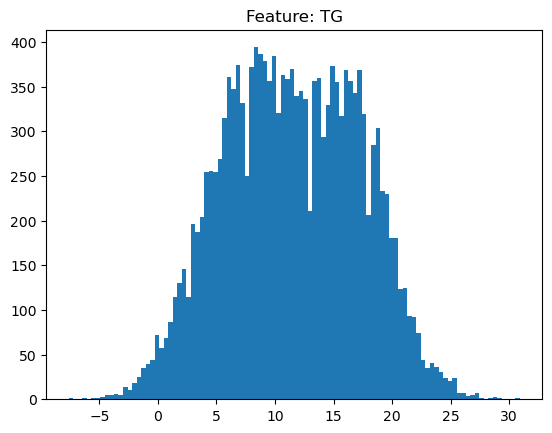

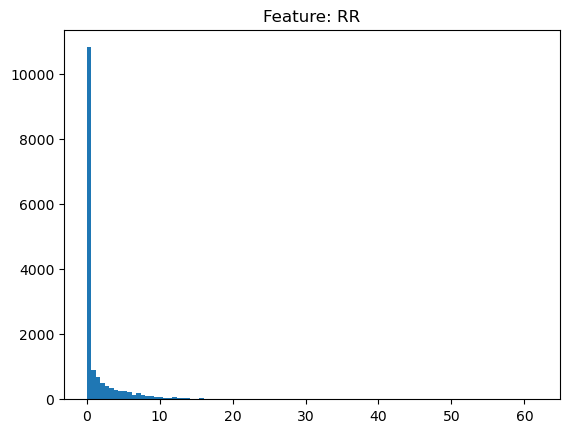

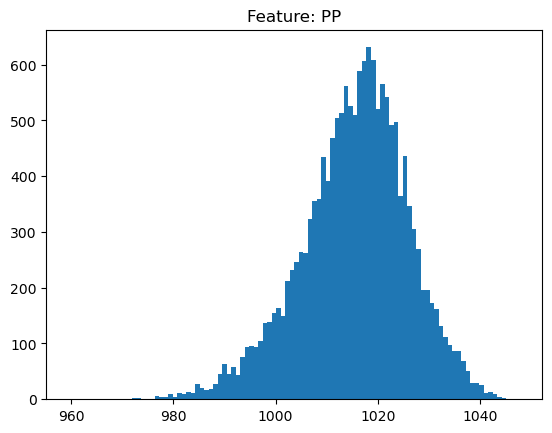

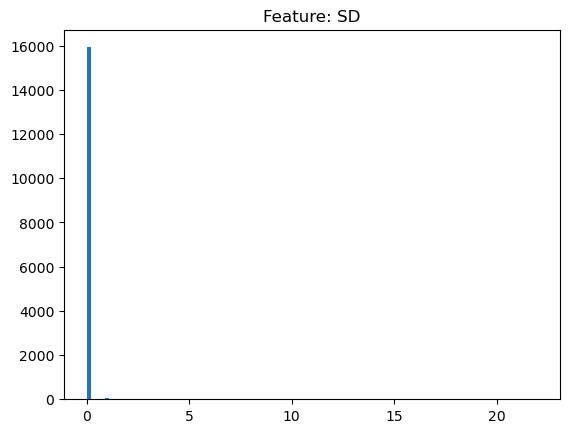

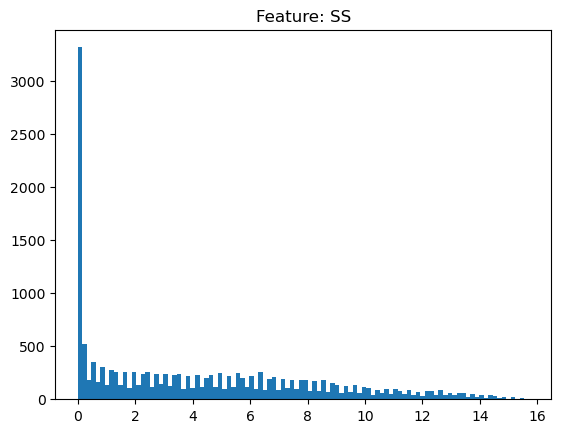

In [49]:
for column in lw_df.columns:
    plt.figure()
    plt.title(f"Feature: {column}")
    plt.hist(lw_df[column], bins=100)
    plt.show()

### Pearson correlation

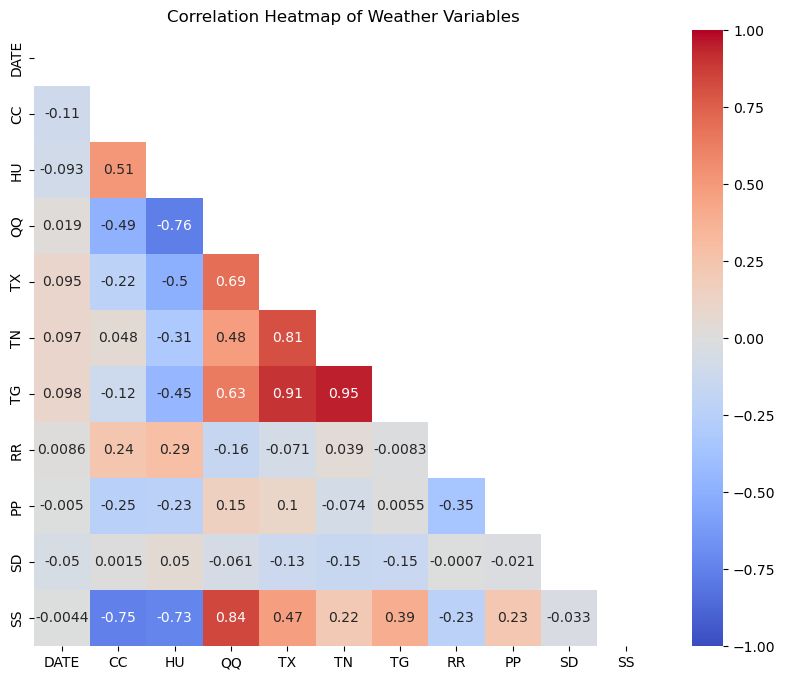

In [50]:
# Selecting weather variables for correlation analysis
weather_variables = lw_df.columns

# Calculating correlation matrix
correlation_matrix = lw_df[weather_variables].corr()

# Mask for the upper triangle
mask = ~np.tri(correlation_matrix.shape[0], k=-1, dtype=bool)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

Scatter plot of each feature with respect to precipiation (RR)

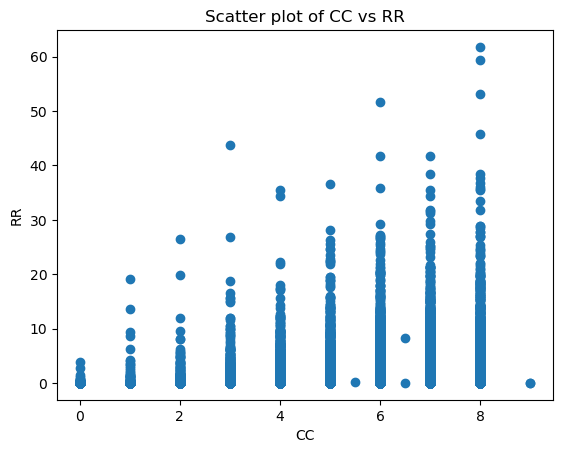

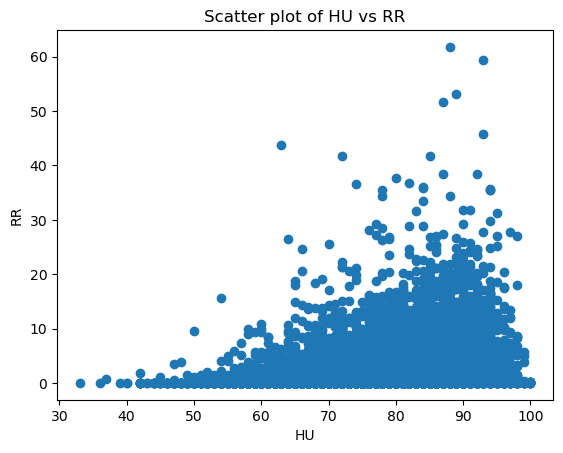

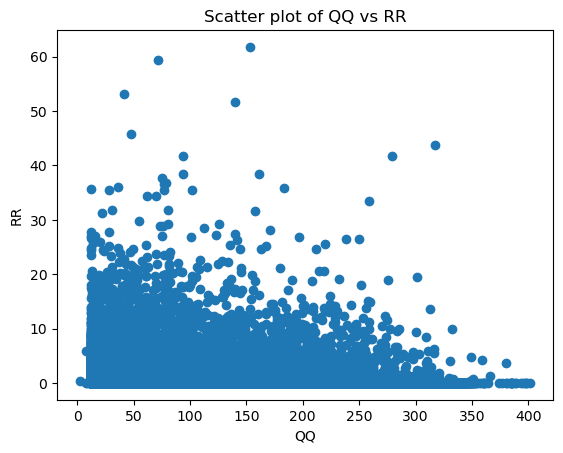

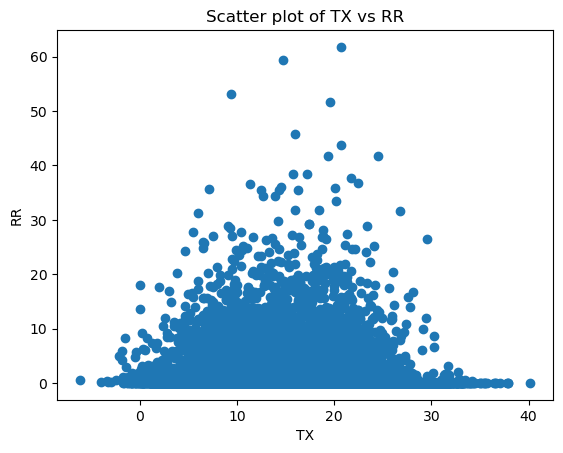

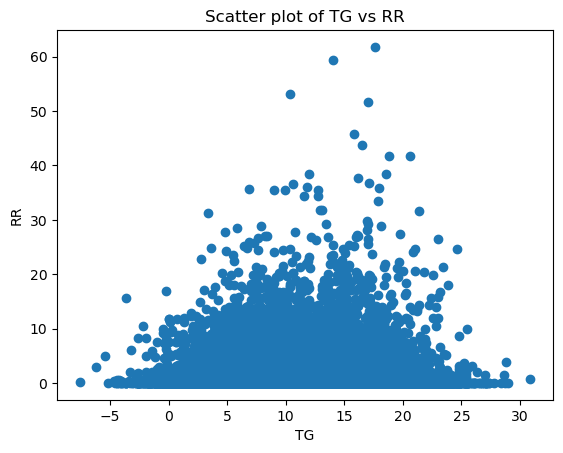

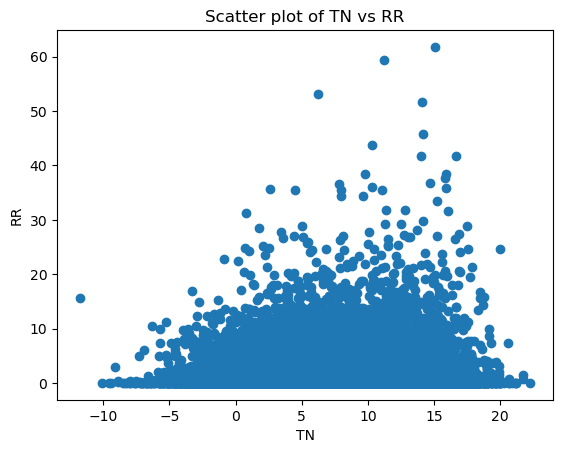

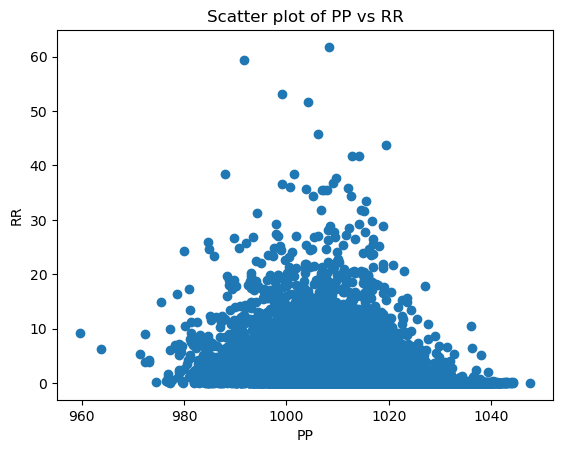

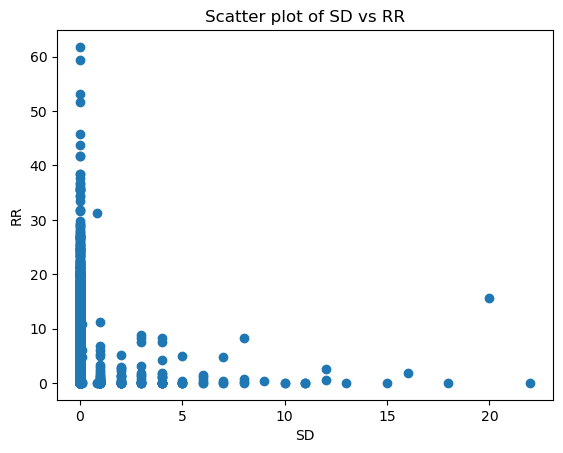

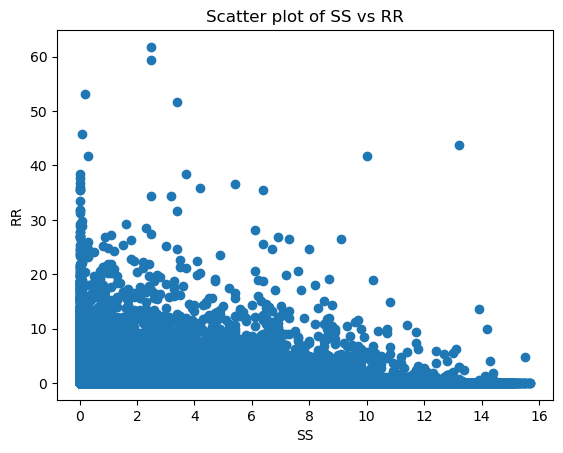

In [51]:
for feature in ['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']:
    plt.scatter(lw_df[feature], lw_df['RR'])
    plt.title(f'Scatter plot of {feature} vs RR')
    plt.xlabel(feature)
    plt.ylabel('RR')
    plt.show()

## Model Approach 1

The question I'm trying to answer here would be how well I can predict precipitation in London using data from 1979-2022. 

There are two problems I should address before I can answer my question:
- 1. A classification problem, whether it will going to rain or not. 
- 2. A regression problem, quantifying my feature.


### Part 1 Classification

Let's extract year, month and day from `DATE` and try add them as features to work on our independent features

In [52]:
lw_df2 = lw_df.copy()

In [53]:
# Our independent features
X = lw_df2[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]

# Add date features
X['Year'] = lw_df['DATE'].dt.year
X['Month'] = lw_df['DATE'].dt.month
X['Day'] = lw_df['DATE'].dt.day

# Target feature
y = lw_df2['RR']

C:\Users\mitth\AppData\Local\Temp\ipykernel_38280\238056828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = lw_df['DATE'].dt.year


In [54]:
X

,CC,HU,QQ,TX,TG,TN,PP,SD,SS,Year,Month,Day
0,2.0,83.0,52.0,2.3,-4.1,-7.5,1019.0,9.0,7.0,1979,1,1
1,6.0,76.0,27.0,1.6,-2.6,-7.5,1025.3,8.0,1.7,1979,1,2
2,5.0,86.0,13.0,1.3,-2.8,-7.2,1020.5,4.0,0.0,1979,1,3
3,8.0,68.0,13.0,-0.3,-2.6,-6.5,1008.4,2.0,0.0,1979,1,4
4,6.0,73.0,29.0,5.6,-0.8,-1.4,1022.5,1.0,2.0,1979,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
16066,6.0,88.0,18.0,12.0,6.7,1.9,1019.3,0.0,0.5,2022,12,27
16067,8.0,91.0,12.0,9.8,8.8,5.7,1001.9,0.0,0.0,2022,12,28
16068,4.0,76.0,25.0,14.1,8.9,8.1,1001.0,0.0,1.5,2022,12,29
16069,7.0,86.0,14.0,14.0,9.3,4.5,997.1,0.0,0.1,2022,12,30


In [55]:
y

0        0.4
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16066    6.2
16067    3.6
16068    0.6
16069    1.8
16070    6.2
Name: RR, Length: 16071, dtype: float64

In [56]:
#  We need to define a threshold of what is considered rainy(>=0.1 mm) or not(0mm)
threshold = 0.1
y = (lw_df['RR'] >= threshold).astype(int)

In [57]:
y.unique()

array([1, 0])

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Initial split into test set and remaining set
X_test, X_remain, y_test, y_remain = train_test_split(X, y, test_size=0.2, random_state=123)

# Next split the remaining set into training and validation sets
X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [59]:
# Define the range of C values
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1,
                    1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

# Lists to store train and validation scores
train_scores = []
val_scores = []

# Hyperparameter tuning loop
for C in C_range:
    # Create and train the model
    my_logreg = LogisticRegression(C=C, random_state=123, solver='lbfgs', max_iter=10000)
    my_logreg.fit(X_train, y_train)
    
    # Evaluate on training set
    train_scores.append(my_logreg.score(X_train, y_train))
    
    # Evaluate on validation set
    val_scores.append(my_logreg.score(X_val, y_val))

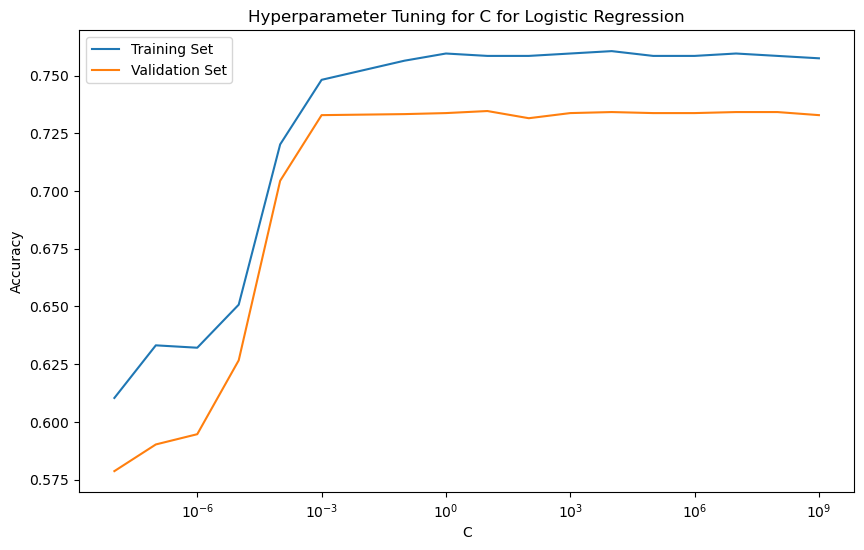

In [60]:
# Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(C_range, train_scores, label='Training Set')
plt.plot(C_range, val_scores, label='Validation Set')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning for C for Logistic Regression')
plt.legend()
plt.show()


It looks like C of 0.001 looks the most promising.

In [61]:
my_logreg = LogisticRegression(C=0.001, random_state=123, solver='lbfgs', max_iter=10000)
my_logreg.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, random_state=123)

In [62]:
y_pred = my_logreg.predict(X_val)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1193
           1       0.70      0.76      0.73      1057

    accuracy                           0.73      2250
   macro avg       0.73      0.73      0.73      2250
weighted avg       0.74      0.73      0.73      2250



In [65]:
confusion_matrix(y_val, y_pred)

array([[847, 346],
       [255, 802]], dtype=int64)

So we have 73% overall accuracy. 77% of the time it will accurately predict it isn't raining, while 70% of the time it will predict it will rain accurately. 

### Part 2 Regression

In [66]:
y[6]

1

In [67]:
# Where y our dependent feature is now only the '1' aka values >0.1 mm
X.loc[np.where(y != 0)]

,CC,HU,QQ,TX,TG,TN,PP,SD,SS,Year,Month,Day
0,2.0,83.0,52.0,2.3,-4.1,-7.5,1019.0,9.0,7.0,1979,1,1
5,5.0,84.0,39.0,8.3,-0.5,-6.6,1027.8,1.0,3.8,1979,1,6
6,8.0,93.0,13.0,8.5,1.5,-5.3,1025.2,0.0,0.0,1979,1,7
7,8.0,95.0,15.0,5.8,6.9,5.3,1018.7,0.0,0.1,1979,1,8
8,4.0,86.0,50.0,5.2,3.7,1.6,1011.7,0.0,5.8,1979,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
16066,6.0,88.0,18.0,12.0,6.7,1.9,1019.3,0.0,0.5,2022,12,27
16067,8.0,91.0,12.0,9.8,8.8,5.7,1001.9,0.0,0.0,2022,12,28
16068,4.0,76.0,25.0,14.1,8.9,8.1,1001.0,0.0,1.5,2022,12,29
16069,7.0,86.0,14.0,14.0,9.3,4.5,997.1,0.0,0.1,2022,12,30


In [68]:
lw_df['RR'].loc[np.where(lw_df['RR'] != 0)].reset_index(drop=True)

0       0.4
1       0.7
2       5.2
3       0.8
4       7.2
       ... 
7680    6.2
7681    3.6
7682    0.6
7683    1.8
7684    6.2
Name: RR, Length: 7685, dtype: float64

In [69]:
# Updating our target feature of RR to be values that aren't 0mm (ie. not raining)
y_log = lw_df['RR'].loc[np.where(lw_df['RR'] != 0)].reset_index(drop=True)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Initial split into test set and remaining set
X_test, X_remain, y_test, y_remain = train_test_split(X, y, test_size=0.2, random_state=123)

# Next split the remaining set into training and validation sets
X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [71]:
y

0        1
1        0
2        0
3        0
4        0
        ..
16066    1
16067    1
16068    1
16069    1
16070    1
Name: RR, Length: 16071, dtype: int32

Model 1

In [72]:
# importing this package to fit and explore our linear regression model
import statsmodels.api as sm

In [73]:
# add constant
X_withconstant_1 = sm.add_constant(X)

In [74]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant_1)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RR   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     652.0
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:09:56   Log-Likelihood:                -8459.6
No. Observations:               16071   AIC:                         1.695e+04
Df Residuals:                   16058   BIC:                         1.705e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8023      0.647     19.797      0.000      11.535      14.070
CC             0.0134      0.003      4.951      0.000       0.008       0.019
HU             0.0150      0.001     29.663      0.000       0.014       0.016
QQ             0.0008   9.91e-05      8.107      0.000       0.001       0.001
TX            -0.0120      0.001     -9.129      0.000      -0.015      -0.009
TG             0.0295      0.003      9.698      0.000       0.024       0.035
TN            -0.0193      0.003     -7.670      0.000      -0.024      -0.014
PP            -0.0167      0.000    -50.706      0.000      -0.017      -0.016
SD            -0.0189      0.006     -2.927      0.003      -0.032      -0.006
SS            -0.0202      0.002     -8.934      0.000      -0.025      -0.016
Year           0.0017      0.000      6.474      0.000       0.001       0.002
Month         -0.0041      0.001     -3.845      0.000      -0.006      -0.002
Day            0.0001      0.000      0.293      0.770      -0.001       0.001
==============================================================================
Omnibus:                     1815.213   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.385
Skew:                           0.037   Prob(JB):                    5.98e-109
Kurtosis:                       2.140   Cond. No.                     4.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the p-values, we can gather that all variables are siginificant in predicting `RR` that has value more than 0 mm except for `Day`. Additionally, some of these variables provide a strong multicollineraity, hence we'd need to drop some to help improve our model.

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                        | 0.328 |

#### Addressing multicollinearity

In [75]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF assumes the presence of a constant in X

X = sm.add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)[1:]

CC        3.073403
HU        2.718286
QQ        7.487177
TX        7.151541
TG       29.429480
TN       17.225219
PP        1.140106
SD        1.027989
SS        7.812878
Year      1.079712
Month     1.275171
Day       1.001400
dtype: float64

Model 2

Due to it being highly colinear, let's try it without `TG` (Mean temperature). Additionally, we can remove `Day` due to its insignificance based on the previous model. 

In [76]:
# drop columns 
X_new = X.drop(columns=['TG', 'TN', 'TX', 'SS', 'QQ', 'CC', 'HU','Day'])

In [77]:
# add constant
# X_withconstant_2 = sm.add_constant(X_new)
# run model again
# 1. Instantiate Model
myregression2 = sm.OLS(y, X_new)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results2 = myregression2.fit()

# Looking at the summary
myregression_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RR   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     1023.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:09:57   Log-Likelihood:                -9826.2
No. Observations:               16071   AIC:                         1.966e+04
Df Residuals:                   16066   BIC:                         1.970e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5685      0.653     33.016      0.000      20.288      22.849
PP            -0.0215      0.000    -63.895      0.000      -0.022      -0.021
SD            -0.0085      0.007     -1.219      0.223      -0.022       0.005
Year           0.0004      0.000      1.311      0.190      -0.000       0.001
Month         -0.0007      0.001     -0.726      0.468      -0.003       0.001
==============================================================================
Omnibus:                    18643.713   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.710
Skew:                           0.118   Prob(JB):                    5.13e-228
Kurtosis:                       1.772   Cond. No.                     4.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                            | 0.328 |
| 2 | PP, SD, Year, Month                            | 0.203 |

Model 3

Due to lack of siginificance, let's only leave PP (pressure).

In [78]:
# drop columns 
X_new2 = X[['PP']]

In [79]:
# add constant
# X_withconstant_2 = sm.add_constant(X_new)
# run model again
# 1. Instantiate Model
myregression3 = sm.OLS(y, X_new2)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results3 = myregression3.fit()

# Looking at the summary
myregression_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     RR   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.473
Method:                 Least Squares   F-statistic:                          1.445e+04
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                        0.00
Time:                        21:09:58   Log-Likelihood:                         -11721.
No. Observations:               16071   AIC:                                  2.344e+04
Df Residuals:                   16070   BIC:                                  2.345e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PP             0.0005    3.9e-06    120.220      0.000       0.000       0.000
==============================================================================
Omnibus:                    55336.883   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2677.722
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                       1.008   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                            | 0.328 |
| 2 | PP, SD, Year, Month                            | 0.203 |
| 3 | PP                                             | 0.163 |

After trying various combinations, we're unable to resolve our multicollinearity issues and our $R$2 has decreased. We can also see we'd have to remove a few more features as well due to their insignificance leaving us with only one. Perhaps we need to use another Machine Learning model, such as a Decision Tree Regressor. 

## 3. Model Approach 2

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [81]:
# Assuming 'y' is the precipitation values
# Target feature
y = lw_df['RR']

# Independent features
X = lw_df[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]

# Add date features
X['Year'] = lw_df['DATE'].dt.year
X['Month'] = lw_df['DATE'].dt.month
X['Day'] = lw_df['DATE'].dt.day

C:\Users\mitth\AppData\Local\Temp\ipykernel_38280\2098801509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = lw_df['DATE'].dt.year


In [82]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [83]:
# Construct the pipeline with models, transformers, and scaler
estimators = [
    ('reduce_dim', PCA()),
    ('dt', DecisionTreeRegressor())
]

pipe = Pipeline(estimators)

# Define the grid of hyperparameters to search
param_grid = {
    'reduce_dim__n_components': [2, 5, 10],  # Varying the number of components in PCA
    'dt__max_depth': [2, 5, 10, 20, 50],  # Varying max_depth for DecisionTreeRegressor
    'dt__min_samples_leaf': [1, 5, 10],  # Varying min_samples_leaf for DecisionTreeRegressor
    'dt__min_samples_split': [2, 5, 10, 20]  # Varying min_samples_split for DecisionTreeRegressor
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 5, 'reduce_dim__n_components': 10}
Best Score: 0.18465001886179344


In [84]:
estimators = [
    ('reduce_dim', PCA(n_components=10)), 
    ('dt', DecisionTreeRegressor(max_depth = 5, min_samples_leaf= 5, min_samples_split= 2))  # Decision Tree with specific hyperparameters
]

my_pipe = Pipeline(estimators)

In [85]:
my_pipe.fit(X_remain, y_remain)

print(f'Test score: {my_pipe.score(X_test, y_test)}')

Test score: -0.04714690792920195


Heavy overfitting and no generalization seen with the unseen test data. Perhaps the model is too complex to be understood. 

## 4. Model Approach 3

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [109]:
X = lw_df[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]
y = lw_df['RR']

# Add date features
X['Year'] = lw_df['DATE'].dt.year
X['Month'] = lw_df['DATE'].dt.month
X['Day'] = lw_df['DATE'].dt.day


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [110]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [89]:
# Construct the pipeline with models, transformers, and scaler
estimators = [
    ('reduce_dim', PCA()),  # You can replace PCA or t-SNE with other preprocessing steps if needed
    ('rf', RandomForestRegressor())
]

pipe = Pipeline(estimators)

# Define the grid of hyperparameters to search
param_grid = {
    'reduce_dim__n_components': [2, 5, 10],         # Range in the number of components 
    'rf__n_estimators': [50, 100, 200],             # Range in the number of trees in the forest
    'rf__max_depth': [None, 10, 20],                # Range in max depth of the trees
    'rf__min_samples_split': [2, 5, 10],            # Range in min samples split
    'rf__min_samples_leaf': [1, 2, 4]               # Range in min samples leaf
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'reduce_dim__n_components': 10, 'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best Score: 0.22249060523397945


#### 1.1 Feature selection based on random forest regressor

In [112]:
rf_model = RandomForestRegressor(n_estimators = 50, max_depth = 10, min_samples_split = 10, min_samples_leaf = 4 )

In [113]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=50)

Text(0.5, 0, 'Random Forest Importance')

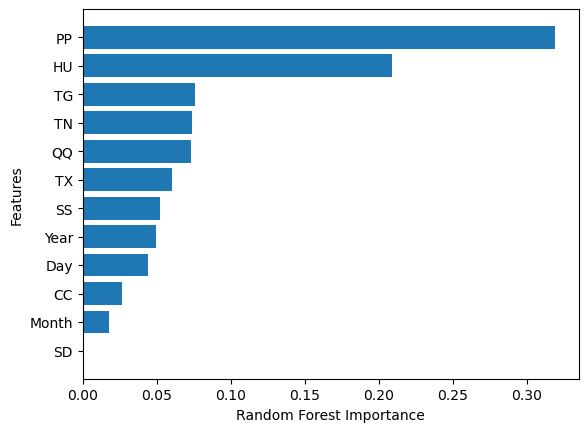

In [114]:
plt.barh(X_train.columns[rf_model.feature_importances_.argsort()], rf_model.feature_importances_[rf_model.feature_importances_.argsort()])
plt.ylabel("Features")
plt.xlabel("Random Forest Importance")

Using cart, can determine the random forest importance of each feature. Issue with general random forest algorithym s cause it focuses on the gini impurity, it has a strong preferance for high cardinality data/features. Means ranking is skewed based off this bias that exist in the model (random forest model, not ours specifically). 

Therefore, we use permutation importance which inserts random values into each of the features and re-evaluates. It is theoretically meant to manipulate the feature set to reevaluate feature importance. After running permutation, you get:

In [115]:
perm_eval = permutation_importance(rf_model, X_train, y_train)

In [116]:
perm_val = perm_eval.importances_mean

Text(0.5, 0, 'Random Forest Importance')

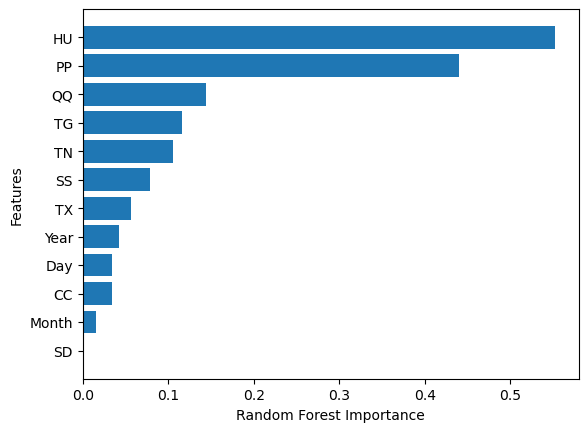

In [117]:
plt.barh(X_train.columns[perm_val.argsort()], perm_val[perm_val.argsort()])
plt.ylabel("Features")
plt.xlabel("Random Forest Importance")

From the above model, HU (humidity), PP(pressure) & QQ (global radiation) influence RR (precipitation).

In [118]:
!python -m pip install shap

Shap is a tree explainer for the random forest regression.

In [119]:
import shap

In [120]:
shap_explain = shap.Explainer(rf_model)

In [121]:
shap_eval = shap_explain(X_train)

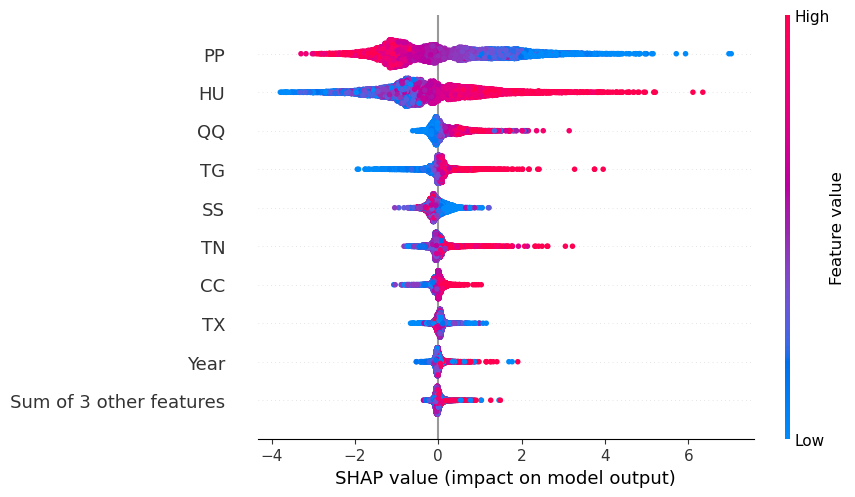

In [122]:
shap.plots.beeswarm(shap_eval, show=False)
labels = [y_labels.get_text() for y_labels in reversed(plt.gca().yaxis.get_majorticklabels())]

The graph showcases in order of feature importance with respect to RR (precipitation). The three features that show the most importance (PP, HU, & QQ). It can be interpretted as follows:

PP - The lower the feature value (blue) the more RR (precipitation) there is, so higher SHAP value. The higher the feature value, the lower the SHAP value. There is also a high concentration of high feature value at a SHAP value of ~-1.

HU - The higher the feature value (red) the more RR (precipiation) there is, so higher SHAP value. The lower the feature value, the lower the SHAP value. There is also a high concentration of low feature value at a SHAP value of ~-1.

QQ - Similar to HU, the higher the feature value (red) the more RR (precipiation) there is, so higher SHAP value. The lower the feature value, the lower the SHAP value. There is however, only a small variance in low feature value.

Homoskedacity

In [123]:
vals = []

for k in X_train.columns:
    if k not in labels:
        vals.append(k)

In [124]:
vals

['SD', 'Month', 'Day']

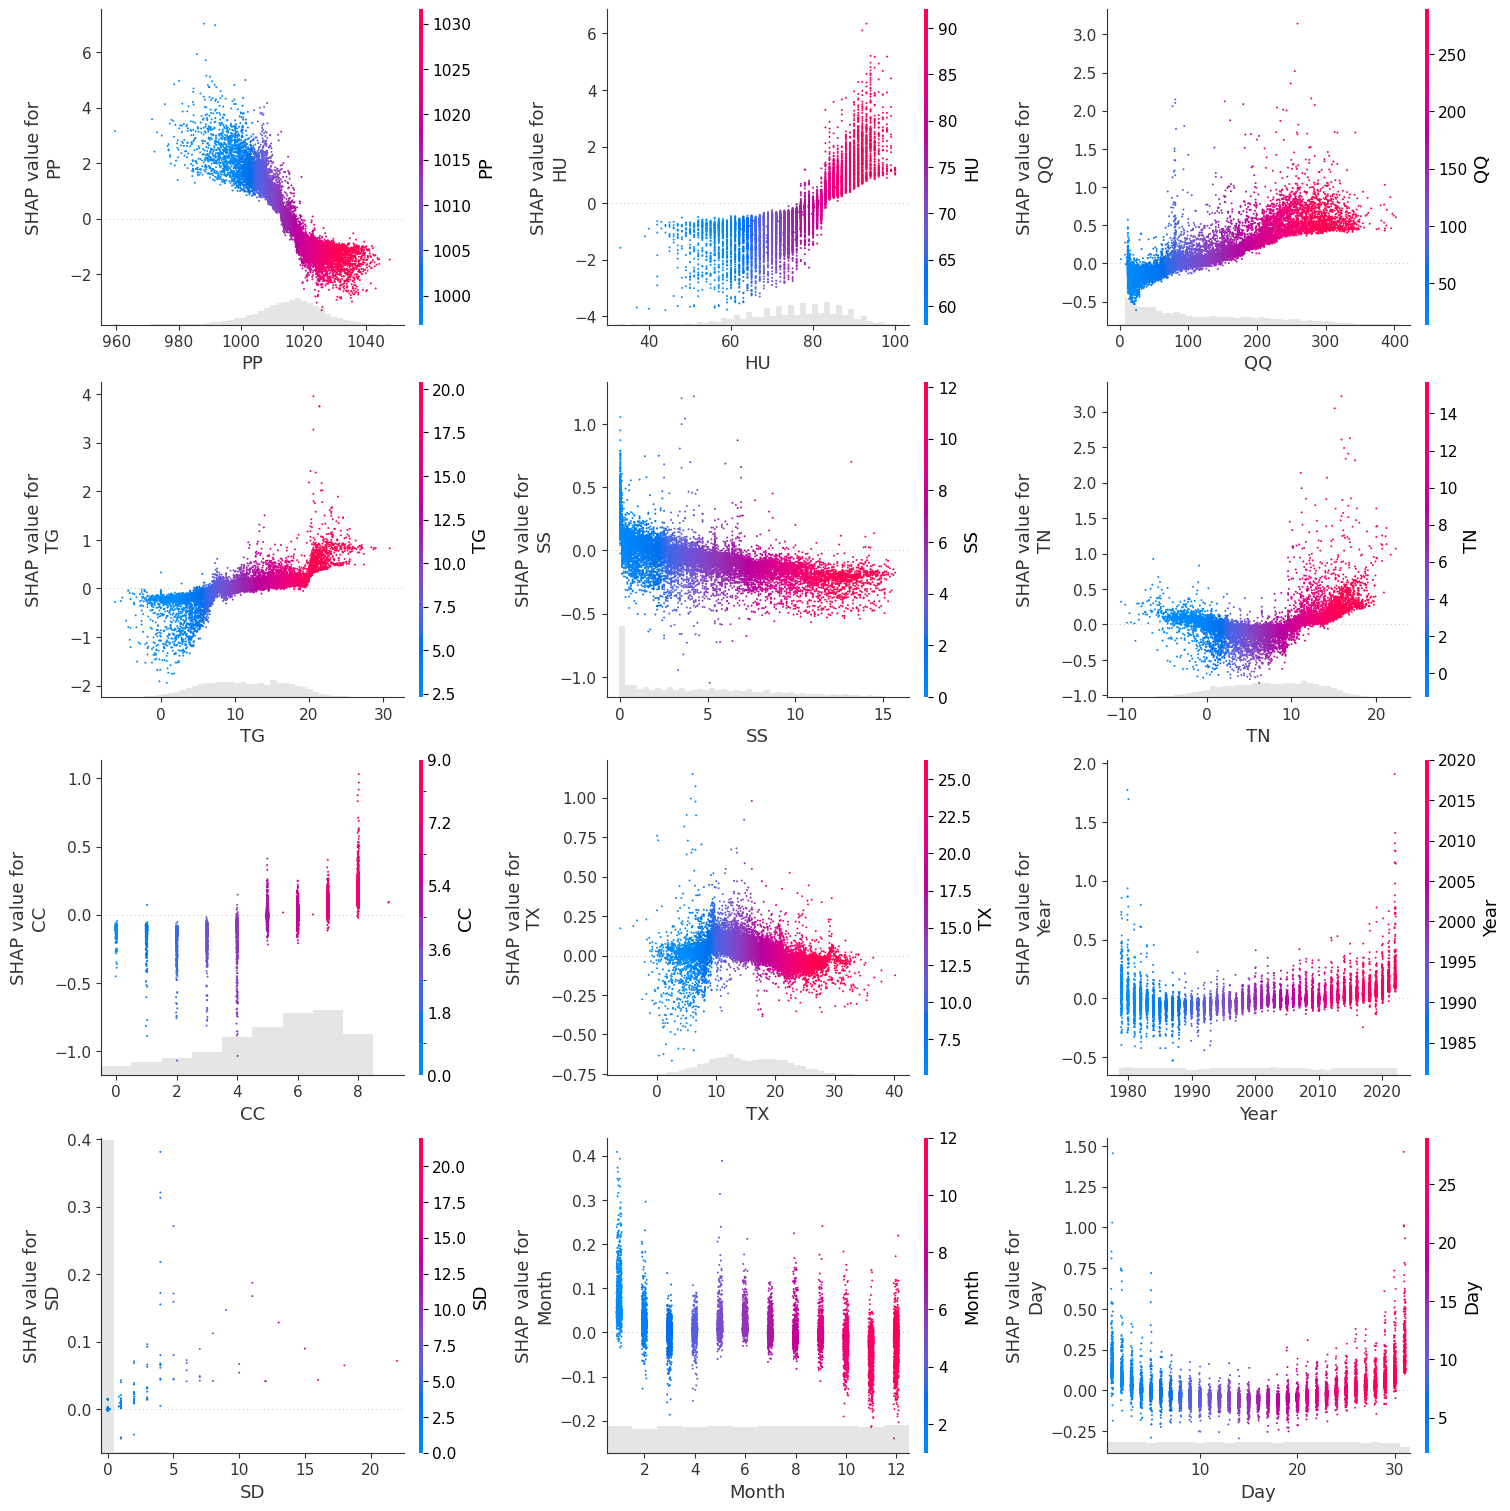

In [125]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), constrained_layout=True)
axs= axes.ravel()

for i, feat in enumerate(list(X_train[labels[:-1]].columns.values) + vals):
    shap.plots.scatter(shap_eval[:, feat], dot_size=2, color=shap_eval[:, feat], ax=axs[i], show=False)

Each graph has two axis and one legend(blue and red colors).

Left axis represents: SHAP value (i.e importance of feature with respect to RR(precipiation)
Bottom axis represents: Magnitude of the feature 

Colored legend represents: Magnitude of the feature (but also shows values from low to high)


It got standardized as opposed to the graph made above this one. So we have from blue to red. 


With PP:
The lower (bluer) the pressure (PP) the higher the chance of RR (precipitation. The range ~ 1005 hPa and ~1015 hPa could be considered a correlator of higher or lower RR. The graph also shows a lower variance of high pressure (cluster we saw earlier even with the graph above), while there is a high variance of low pressure values with respect to correlating to precipitation. 

Now we run Decision Tree using these three features. 

In [126]:
#Independent features
X = lw_df[['PP', 'HU', 'QQ']]

#Dependent feature
y = lw_df['RR']

In [127]:
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [128]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scal, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [104]:
#estimators = [
    #('reduce_dim', PCA(n_components=10)), 
   # ('dt', DecisionTreeRegressor(max_depth = 5, min_samples_leaf= 5, min_samples_split= 2))  # Decision Tree with specific hyperparameters]

#my_pipe = Pipeline(estimators)

In [129]:
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scal, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Decision Tree Regressor with specific hyperparameters
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=2)

# Fit the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [130]:
# Print test score
print(f'Test score: {dt.score(X_test, y_test)}')

Test score: 0.16777216486152102


In [133]:
from sklearn.metrics import mean_squared_error

# Get predictions
y_pred = dt.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 11.670855531693375


Approximately 16.78% of the variance in the target variable ('RR', precipitation) can be explained by the features included in our model.
The relatively low R-squared value indicates that the model might not be capturing a substantial portion of the variability in the target variable. In other words, the features in the model explain only a modest percentage of the observed variation in precipitation.

Perhaps we need to approach this through another manner given the context of our specific problem. In some cases, predicting certain phenomena like precipitation can be inherently challenging due to the complex and multifaceted nature of weather patterns.

#### 1.2 Feature selection based on PCA (reducing dimensions)

In [312]:
pca_model = PCA(n_components=10) # based on our grid search from earlier

In [313]:
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [314]:
X_red = pca_model.fit_transform(X_scal)

In [315]:
X_red

array([[ 4.12614748,  6.4525598 , 11.1886049 , ..., -1.02094957,
         0.32738383,  0.12461056],
       [ 4.73101798,  5.11029693, 10.1063682 , ...,  0.47676348,
         0.43887901, -0.11443153],
       [ 4.71650843,  3.73381857,  5.5751284 , ..., -0.36486562,
         0.33237348, -0.26756141],
       ...,
       [ 0.75560656, -0.94372321, -1.9244862 , ...,  0.34948216,
         0.75686102, -0.23401818],
       [ 1.90111864, -1.78162164, -1.75900033, ...,  0.50337522,
        -0.27766625, -0.54447138],
       [ 1.73192544, -2.40933457, -1.73383645, ...,  0.58026302,
        -0.27147584,  0.17778665]])

In [316]:
pca_model.explained_variance_ratio_ 

array([0.36223791, 0.16800067, 0.08657835, 0.0840013 , 0.08172392,
       0.07867068, 0.07070509, 0.02976812, 0.01860618, 0.01200905])

Each array we saw above is now a ratio of 10 components with a specific score. Each of them are now ordered with respect to how well they correlate to precipitation.

In [318]:
np.sum(pca_model.explained_variance_ratio_[:7])

0.9319179219061668

Above we can see, 7 components of the 10 are able to explain 93% of the dataset with respect to precipitation. 

In [310]:
list(range(0,8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [263]:
pca_model.components_

array([[ 2.51577672e-01,  3.74418772e-01, -4.31550674e-01,
        -4.14615869e-01, -4.00926113e-01, -3.37881404e-01,
        -9.58776758e-02,  6.81630085e-02, -3.80233884e-01,
        -5.36688151e-02, -4.66027925e-02, -1.63404865e-03],
       [-4.43291835e-01, -2.52942115e-01,  1.43771942e-01,
        -2.51830291e-01, -3.57870425e-01, -4.57828152e-01,
         2.83548189e-01,  1.32575890e-01,  3.48220152e-01,
        -3.17014753e-02, -3.11107538e-01, -2.68292955e-02],
       [ 1.50177639e-01, -2.02629393e-02,  1.25179975e-01,
         4.30701946e-02,  5.82190696e-02,  6.25966657e-02,
        -2.34795747e-01,  5.66704464e-01,  3.96682758e-02,
        -5.92416603e-01, -1.63090211e-01, -4.43611099e-01],
       [-9.71685077e-03, -5.72294240e-02, -1.24200286e-02,
        -1.21913549e-02,  2.57435159e-03,  1.70697787e-02,
        -2.03178948e-01,  5.28635421e-02, -6.04924677e-02,
         6.80252980e-01, -2.05846217e-01, -6.65715498e-01],
       [-2.48809108e-01,  1.21831431e-01, -1.4169306

In [279]:
important_index = [np.abs(pca_model.components_[k]).argmax() for k in range(10)]

In [280]:
important_index

[2, 5, 9, 9, 10, 7, 6, 1, 2, 3]

In [281]:
important_features = [X.columns[important_index[m]] for m in range(10)]

In [282]:
important_features

['QQ', 'TN', 'Year', 'Year', 'Month', 'SD', 'PP', 'HU', 'QQ', 'TX']

From this we can see that there are relationship unbenounced to us that the model was able to see. For example, some aspect of `year`(along with some other feature/s), `month`(same) and `temp min`(same) is able to showcase a strong correlation to precipitation (RR). We would have to explore more in depth with an SME to determine what that is. 

In [287]:
np.transpose(pca_model.components_[0:2, :])

array([[ 0.25157767, -0.44329184],
       [ 0.37441877, -0.25294211],
       [-0.43155067,  0.14377194],
       [-0.41461587, -0.25183029],
       [-0.40092611, -0.35787043],
       [-0.3378814 , -0.45782815],
       [-0.09587768,  0.28354819],
       [ 0.06816301,  0.13257589],
       [-0.38023388,  0.34822015],
       [-0.05366882, -0.03170148],
       [-0.04660279, -0.31110754],
       [-0.00163405, -0.0268293 ]])

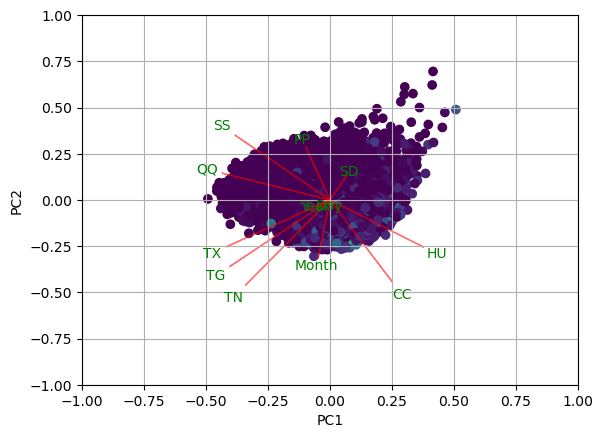

In [307]:
def myplot(pca_score,coeff,labels=None):
    xs = pca_score[:,0]
    ys = pca_score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only 2 PCs.
myplot(X_red[:,0:2],np.transpose(pca_model.components_[0:2, :]), X.columns)
plt.show()

It is hard to see any patterns on a static chart like this with so many data points. Lets explore a better visualization. 

Perhaps we can try linking to RNN (LSTM) to better understand .

In [344]:
# imports
import os.path

In [345]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, BatchNormalization
from tensorflow.keras.utils import plot_model

Like the Decision Tree, we seem to see alot of overfitting with the data when it comes to unseen data. 

## 5. Conclusion

We can summarize that our initial approach of splitting the problem up into first a classification problem and then into a regression one didn't provide the result we wanted. Despite working our way through feature selection, we achieved a very low $R$2. 

Next, we used a Random Forest Generator to aid us with our feature selection leaving us with three main important features: PP, HU & QQ. After running grid search to find optimum hyperparameter values, and ran a Decision Tree with the important features, we ended up with similar $R$2 value. 

Finally, we will use a combination of PCA, LSTM (RNN) & Pytorch to help us attain a better result in predicting precipitation in London. 